# Importing Packages

In [1]:
import os 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.linear_model as linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier  
import warnings
import scikitplot as skplt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# 1. Load Dataset

In [3]:
data_dir ='C:\\Users\\Keerthi\\Desktop\\Jigsaw\\CAPSTONE Project\\02 data'
os.chdir(data_dir)
data= pd.read_csv("sample_50K_V03.csv")

In [4]:
data.head()

,TKT_LOGGED_DATE1,CLEAN_INTENT,TICKET_DATE,TICKET_DATE_15D,POS_COUNT,POS_TKT_LOGGED_DATE1,POS_VINTAGE_SCORE,POS_SYS_TOUCH_PT,REN_COUNT,REN_TKT_LOGGED_DATE1,...,PLAN_TYPE_06,PLAN_TYPE_07,CLI_SNGL_MLTPL_PLCYHLDR_FLG_MULTIPLE,CLI_SNGL_MLTPL_PLCYHLDR_FLG_SINGLE,INCOME_BUK_04,INCOME_BUK_02,INCOME_BUK_03,INCOME_BUK_05,INCOME_BUK_01,mapped_pol_id
0,6/13/2018 7:33,DUEDATE/AMOUNT,6/13/2018 0:00,5/29/2018 0:00,0,0,0,0,3,6/12/2018 00:00,...,0,0,1,0,0,1,0,0,0,ZTAEBFBFOOVMWLAEOO
1,6/11/2018 11:23,PROBABLESURRENDER,6/11/2018 00:00,5/27/2018 0:00,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,WLCGBFZTWLXRZTVMOO
2,4/21/2018 5:00,PAYMENTPROCEDURE/ONLINEPAYMENTPROCEDURE,4/21/2018 0:00,4/6/2018 00:00,0,0,0,0,1,4/13/2018 0:00,...,0,0,0,1,0,0,0,0,1,CGAEVMBFXRVMOOAEZT
3,3/30/2019 10:24,PROBABLESURRENDER,3/30/2019 0:00,3/15/2019 0:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,XRZTAEVMWLZTXRDKXR
4,11/13/2018 5:42,POLICYSTATUS-ACTIVE/LAPSE,11/13/2018 0:00,10/29/2018 0:00,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,BFDKCGXRYSAEBFCGXR


# 2. Descriptive Stats

In [5]:

data.CLEAN_INTENT.value_counts()/len(data)

DUEDATE/AMOUNT                             0.252324
ACCOUNTVALUE/SURRENDERVALUE                0.146389
POLICYSTATUS-ACTIVE/LAPSE                  0.141827
PREMIUMPAYMENT/CHEQUERECEIVEDENQUIRY       0.105027
ECS/CREDITCARDINQUIRY                      0.067377
PREMIUMRECEIPTREQUEST                      0.066430
PROBABLESURRENDER                          0.051083
POSREQUESTSTATUSREQUIRED                   0.047295
BONUSINQUIRY                               0.039023
POLICYPACKDISPATCHSTATUS/CLARIFICATION     0.029050
PAYMENTPROCEDURE/ONLINEPAYMENTPROCEDURE    0.020294
STATUSOFTHEPROPOSAL                        0.020082
LOANENQUIRY                                0.013800
Name: CLEAN_INTENT, dtype: float64

In [6]:

data['CLEAN_INTENT'].value_counts()


DUEDATE/AMOUNT                             13055
ACCOUNTVALUE/SURRENDERVALUE                 7574
POLICYSTATUS-ACTIVE/LAPSE                   7338
PREMIUMPAYMENT/CHEQUERECEIVEDENQUIRY        5434
ECS/CREDITCARDINQUIRY                       3486
PREMIUMRECEIPTREQUEST                       3437
PROBABLESURRENDER                           2643
POSREQUESTSTATUSREQUIRED                    2447
BONUSINQUIRY                                2019
POLICYPACKDISPATCHSTATUS/CLARIFICATION      1503
PAYMENTPROCEDURE/ONLINEPAYMENTPROCEDURE     1050
STATUSOFTHEPROPOSAL                         1039
LOANENQUIRY                                  714
Name: CLEAN_INTENT, dtype: int64

In [7]:
data.describe()

,POS_COUNT,POS_VINTAGE_SCORE,POS_SYS_TOUCH_PT,REN_COUNT,REN_VINTAGE_SCORE,REN_SYS_TOUCH_PT,DELIVERY_STATUS,UNO_CS_COMM_COUNT,COMM_VINTAGE_SCORE,UNO_CS_COMM_SYS,...,PLAN_TYPE_05,PLAN_TYPE_06,PLAN_TYPE_07,CLI_SNGL_MLTPL_PLCYHLDR_FLG_MULTIPLE,CLI_SNGL_MLTPL_PLCYHLDR_FLG_SINGLE,INCOME_BUK_04,INCOME_BUK_02,INCOME_BUK_03,INCOME_BUK_05,INCOME_BUK_01
count,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,...,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000,51739.000000
mean,0.141054,1.103732,0.108448,0.389861,1.871200,0.179961,0.781693,0.985272,2.649645,0.258915,...,0.075649,0.022981,0.001102,0.216065,0.490462,0.048861,0.250527,0.131912,0.018593,0.256634
std,0.481330,3.523803,0.310949,1.036214,4.381829,0.384159,3.796765,4.212270,4.916195,0.438043,...,0.264438,0.149843,0.033174,0.411563,0.499914,0.215579,0.433321,0.338398,0.135085,0.436780
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,16.000000,15.000000,1.000000,23.000000,15.000000,1.000000,655.000000,656.000000,14.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.dtypes

TKT_LOGGED_DATE1                        object
CLEAN_INTENT                            object
TICKET_DATE                             object
TICKET_DATE_15D                         object
POS_COUNT                                int64
POS_TKT_LOGGED_DATE1                    object
POS_VINTAGE_SCORE                        int64
POS_SYS_TOUCH_PT                         int64
REN_COUNT                                int64
REN_TKT_LOGGED_DATE1                    object
REN_VINTAGE_SCORE                        int64
REN_SYS_TOUCH_PT                         int64
DELIVERY_STATUS                          int64
UNO_CS_COMM_COUNT                        int64
COMM_TKT_DT                             object
COMM_VINTAGE_SCORE                       int64
UNO_CS_COMM_SYS                          int64
SCP_SMS_AGENT - OTHER                    int64
SCP_SMS_CUSTOMER AWARENESS               int64
SCP_SMS_LAPSATION & REVIVAL              int64
SCP_SMS_MOBILE NUMBER LINK               int64
SCP_SMS_PAYME

# 3. Data Transformation

In [9]:
data=data.drop(['mapped_pol_id','TKT_LOGGED_DATE1','TKT_LOGGED_DATE','TICKET_DATE','TICKET_DATE_15D','POS_TKT_LOGGED_DATE1','REN_TKT_LOGGED_DATE1','COMM_TKT_DT','MON_TKT_CLEARNACE_DATE','MON_TKT_BOUNCE_DATE','DUE_DATE_PAID'],axis=1)
print(data.shape)

(51739, 169)


### 3.1 Imputing Missing values in POL_PPT columns 

In [10]:
pol_ppt_mode=data.loc[:,"POL_PPT"].mode()
data['POL_PPT']=data['POL_PPT'].apply(lambda x:pol_ppt_mode if x=='999' else x)


### 3.2 Combining sparsely populated columns


In [11]:
sparse=[['SCP_SMS_AGENT - OTHER','SCP_SMS_CUSTOMER AWARENESS','SCP_SMS_LAPSATION & REVIVAL','SCP_SMS_MOBILE NUMBER LINK','SCP_SMS_PAYMENT','SCP_SMS_POS','SCP_SMS_RENEWAL','SCP_SMS_TERMINATION',
'SCP_SMS_WEBSITE MESSAGE'],
['IVR_ACCOUNT VALUE/ SURRENDER VALUE','IVR_OTHERS','IVR_POLICY STATUS - ACTIVE / LAPSE','IVR_PREMIUM RECEIPT REQUEST','IVR_SYS'],
['UNO_EML_ACCOUNT VALUE/ SURRENDER VALUE','UNO_EML_BONUS INQUIRY','UNO_EML_CAMPAIGN RELATED INFORMATION','UNO_EML_DOCUMENTATION REQUIREMENT FOR POS CHANGES','UNO_EML_DUE DATE/ AMOUNT','UNO_EML_ECS / CREDIT CARD INQUIRY',
'UNO_EML_ECS DEBIT INCORRECT / NOT DONE','UNO_EML_FOLLOW UP - STATUS OF PROPOSAL','UNO_EML_KYC DOCUMENT STATUS','UNO_EML_MISS-SELLING / FRAUD BY AGENT','UNO_EML_OTHERS','UNO_EML_PERSONAL UPDATE',
'UNO_EML_POLICY BENEFITS / DEATH BENEFIT','UNO_EML_POLICY SERVICING - CLARIFICATION/ FOLLOW UP','UNO_EML_POLICY STATUS - ACTIVE / LAPSE','UNO_EML_POS REQUEST DELAY / ERROR',
'UNO_EML_PROCESSING DELAY / ERROR','UNO_EML_THIRD PARTY VERIFICATION'],
['MEGA_MEGA_OTHERS','MEGA_SCP_MG_1','MEGA_SCP_MG_10','MEGA_SCP_MG_11','MEGA_SCP_MG_12','MEGA_SCP_MG_13','MEGA_SCP_MG_14','MEGA_SCP_MG_2','MEGA_SCP_MG_3',
'MEGA_SCP_MG_4','MEGA_SCP_MG_5','MEGA_SCP_MG_6','MEGA_SCP_MG_7','MEGA_SCP_MG_9','MEGA_SYS'],
['SCP_EML_SCP_EM_10','SCP_EML_SCP_EM_13','SCP_EML_SCP_EM_14','SCP_EML_SCP_EM_15','SCP_EML_SCP_EM_16','SCP_EML_SCP_EM_17','SCP_EML_SCP_EM_18','SCP_EML_SCP_EM_19','SCP_EML_SCP_EM_3','SCP_EML_SCP_EM_4','SCP_EML_SCP_EM_5','SCP_EML_SCP_EM_6','SCP_EML_SCP_EM_7','SCP_EML_SCP_EM_8',
'SCP_EML_SCP_EM_9'],
['HELP_LINE_ACCOUNTVALUE/SURRENDERVALUE','HELP_LINE_BONUSINQUIRY','HELP_LINE_DUEDATE/AMOUNT','HELP_LINE_ECS/CREDITCARDINQUIRY','HELP_LINE_LOANENQUIRY','HELP_LINE_OTHERS',
'HELP_LINE_PAYMENTPROCEDURE/ONLINEPAYMENTPROCEDURE','HELP_LINE_POLICYPACKDISPATCHSTATUS/CLARIFICATION','HELP_LINE_POLICYSTATUS-ACTIVE/LAPSE','HELP_LINE_POSREQUESTSTATUSREQUIRED','HELP_LINE_PREMIUMPAYMENT/CHEQUERECEIVEDENQUIRY',
'HELP_LINE_PREMIUMRECEIPTREQUEST','HELP_LINE_PROBABLESURRENDER','HELP_LINE_STATUSOFTHEPROPOSAL'],
['ind_surr'],
['POLICY_CHNL_03','POLICY_CHNL_06'],
['CLI_OCCUPATION_CAT_01','CLI_OCCUPATION_CAT_03','CLI_OCCUPATION_CAT_05','CLI_OCCUPATION_CAT_06','CLI_OCCUPATION_CAT_07','CLI_OCCUPATION_CAT_08'],
['CLI_EDUCATION_CAT_01'],
['PLAN_FAMILY_02','PLAN_FAMILY_04','PLAN_FAMILY_05','PLAN_FAMILY_06','PLAN_FAMILY_08','PLAN_FAMILY_10','PLAN_FAMILY_11','PLAN_FAMILY_12','PLAN_FAMILY_13','PLAN_FAMILY_14','PLAN_FAMILY_15'],
['PLAN_TYPE_06'],['INCOME_BUK_04','INCOME_BUK_05']]

In [12]:
club_cols = pd.DataFrame()
datacs=data
for i in sparse :
    lst=i[0]
    column_name=lst[0:7] 
    datacs['TO_CLUB'] =datacs[i].sum(axis = 1)
    club_cols[column_name] =datacs['TO_CLUB'].apply(lambda x : 0 if x == 0  else 1)
    datacs=datacs.drop(i,axis=1)

club_cols.columns =  club_cols.columns+'_OTHERS' 
datacs=pd.concat([datacs, club_cols], axis=1)
datacs=datacs.drop(['TO_CLUB'] ,axis=1)



In [13]:
data_1=datacs.copy()
print(data_1.shape)
data_2=data_1.copy()

(51739, 82)


## Combining INTENTS


In [14]:
variable=['PREMIUMPAYMENT/CHEQUERECEIVEDENQUIRY','PREMIUMRECEIPTREQUEST']
data_1.CLEAN_INTENT.loc[(data_1['CLEAN_INTENT'].isin(variable))]='PREMIUMSERVICES'


C:\Users\Keerthi\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
variable=['PAYMENTPROCEDURE/ONLINEPAYMENTPROCEDURE','ECS/CREDITCARDINQUIRY']
data_1.CLEAN_INTENT.loc[(data_1['CLEAN_INTENT'].isin(variable))] ='PAYMENTSERVICES'

C:\Users\Keerthi\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
variable=['POSREQUESTSTATUSREQUIRED','POLICYPACKDISPATCHSTATUS/CLARIFICATION','STATUSOFTHEPROPOSAL']
data_1.CLEAN_INTENT.loc[(data_1['CLEAN_INTENT'].isin(variable))]='STATUSENQUIRY'

C:\Users\Keerthi\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
variable=['BONUSINQUIRY','LOANENQUIRY']
data_1.CLEAN_INTENT.loc[(data_1['CLEAN_INTENT'].isin(variable))]='BONUS/LOANENQUIRY'

C:\Users\Keerthi\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:

data_1['CLEAN_INTENT'].value_counts()


DUEDATE/AMOUNT                 13055
PREMIUMSERVICES                 8871
ACCOUNTVALUE/SURRENDERVALUE     7574
POLICYSTATUS-ACTIVE/LAPSE       7338
STATUSENQUIRY                   4989
PAYMENTSERVICES                 4536
BONUS/LOANENQUIRY               2733
PROBABLESURRENDER               2643
Name: CLEAN_INTENT, dtype: int64

# 4. Convert  Intents to Numeric labels

In [19]:
from sklearn import preprocessing
le_1 = preprocessing.LabelEncoder()
data_1['CLEAN_INTENT'] = le_1.fit_transform(data_1['CLEAN_INTENT'])
intents_mapping= {l : i for i,l in enumerate (le_1.classes_)}
intents_mapping

{'ACCOUNTVALUE/SURRENDERVALUE': 0,
 'BONUS/LOANENQUIRY': 1,
 'DUEDATE/AMOUNT': 2,
 'PAYMENTSERVICES': 3,
 'POLICYSTATUS-ACTIVE/LAPSE': 4,
 'PREMIUMSERVICES': 5,
 'PROBABLESURRENDER': 6,
 'STATUSENQUIRY': 7}

In [20]:

data_1['CLEAN_INTENT'].value_counts()


2    13055
5     8871
0     7574
4     7338
7     4989
3     4536
1     2733
6     2643
Name: CLEAN_INTENT, dtype: int64

# 5. Sampling

In [21]:

X_train, X_test, Y_train, Y_test = train_test_split(data_1.drop("CLEAN_INTENT", axis=1), data_1['CLEAN_INTENT'], test_size = 0.2,stratify=data_1['CLEAN_INTENT'], random_state=590)  


In [22]:
data_train = pd.concat([X_train.reset_index(drop='True'),Y_train.reset_index(drop='True')],axis=1)


In [23]:
Y_test = Y_test.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# 6 Predefined Functions

### 6.1 To convert CLEAN_INTENT to binary format(One Vs All)

In [24]:

def features_clear_intent (df,variable):
    data=df
    data_new = data.drop("CLEAN_INTENT", axis=1)
    data_new['CLEAN_INTENT']=data['CLEAN_INTENT'].apply(lambda x : 1 if x == variable else 0)  
    return data_new
    


### 6.2 Give the Top-N features based on their feature importance

In [25]:

top=50
def featureselection_modelfit(alg, dtrain, predictors,target,top, performCV=True, printFeatureImportance=True, cv_folds=5):
    alg.fit(dtrain[predictors], dtrain[target])
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    if printFeatureImportance:      
        feat_importances = pd.Series(alg.feature_importances_, index=predictors)
        lst=(feat_importances.nlargest(top))
        imp_features =list(lst.index)
        return imp_features
        

### 6.3 Calculating WOE and IV

In [28]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def more_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def binary_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target,variable):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1   
    for i in x:
        if i.upper() not in (final.upper()):         
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = more_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = binary_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    #iv['Intent'] = variable
    iv = iv.reset_index()
    #return(iv_df,iv)
    return(iv)

### 6.4 Variable Profiling

In [29]:
def data_vars_profile(df1,clean_intent,x):
    count = -1   
    for i in x:
        d3 = pd.DataFrame({},index=[])
        d3["n"] = df1.loc[df1['CLEAN_INTENT']==1 ].groupby([i])[i].count()       
        d3["N"] = df1[i].value_counts()
        d3["Percent"] = d3["n"]/d3["N"]
        d3["VAR_NAME"] = i
        d3["CLEAN_INTENT"] = clean_intent   
        d3 = d3.replace([np.inf, -np.inf], 0)
        count = count + 1
        if count == 0:
                
                var_df = d3
        else:
                
                var_df = var_df.append(d3)
    
    return(var_df)       


### 6.5 Feature selection with 'N' Significance level

In [30]:
import statsmodels.formula.api as sm
def backwardElimination(x, Y, N, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > N:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    #rint('columns in IFFFF-->',columns)
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

### 6.6 To Calculate ROC for MutiClass Target Vatiable

In [31]:

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(truth, pred, average="macro"):

    lb = LabelBinarizer()
    lb.fit(truth)

    truth = lb.transform(truth)
    pred = lb.transform(pred)

    return roc_auc_score(truth, pred, average=average)

### 6.7 To Plot ROC for MutiClass Target Vatiable

In [32]:
def multiclass_roc_auc_plot(truth, pred, average="macro"):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes=8
    
    lb = LabelBinarizer()
    lb.fit(truth)

    truth = lb.transform(truth)
    pred = lb.transform(pred)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(truth[:, i], pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    for i in (range(n_classes)):
        plt.plot(fpr[i], tpr[i], 
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()


### 6.8 To calculate Metric to Validate Model

In [33]:
from sklearn.metrics import precision_score, recall_score,f1_score,classification_report,accuracy_score,confusion_matrix,cohen_kappa_score

def evaluate_model(Y_test, Y_pred, Ypred_proba = None):
    print('ROC-AUC score of the model   :',multiclass_roc_auc_score(Y_test,Y_pred))
    print('F1 Score                     : {}\n'.format(f1_score(Y_test, Y_pred,pos_label='positive',average='macro')))
    print('Precision                    : {}\n'.format(precision_score(Y_test, Y_pred,pos_label='positive',average='macro')))
    print('Recall                       : {}\n'.format(recall_score(Y_test, Y_pred,pos_label='positive',average='macro')))
    print('Accuracy of the model        : {} \n'.format(accuracy_score(Y_test, Y_pred)))
    print('Confusion matrix             : \n{}\n'.format(confusion_matrix(Y_test, Y_pred)))
    print('Classification report        : \n{}\n'.format(classification_report(Y_test, Y_pred)))
    multiclass_roc_auc_plot(Y_test, Y_pred)
  

### 6.9 To Plot Accuracies for each model in each Feature selection process

In [34]:
def func_graph(results,names):

    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    width = 0.5        
    bars=plt.bar(names,results, width, align='center')
    ax.set_xticklabels(names)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .005, yval)
    plt.show()

### 6.10 To Calculate Accuracy,ROC, plot ROC,plot confusion matrix & classification report for TOP-3 Intents

In [35]:
# Accuracy & classification report fot TOP-3

def metric_calc(classifier, X_train, label, X_test, valid_y):
    
    classifier.fit(X_train, label)
    n = 3
    classifier.probability = True
    probas = classifier.predict_proba(X_test)
    predictions = classifier.predict(X_test)

    top_n_predictions = np.argsort(probas, axis = 1)[:,-n:] #probability 

    top_class = classifier.classes_[top_n_predictions]#classes

    top_class_df = pd.DataFrame(data=top_class)
    predictions_df= pd.DataFrame(data=predictions)
    
    #results = pd.concat([valid_y.reset_index(drop='True'),X_test.reset_index(drop='True')],axis=1)

    results = pd.merge(valid_y, X_test, left_index=True, right_index=True)
    results = pd.merge(results, top_class_df, left_index=True, right_index=True)
    results['Actual_predict_class']=predictions_df

    leng =results.shape[0]
    predicted_class=[]
    results['predicted_class']=0
    for i in range(0,leng) :

        if (results.iloc[:,0][i] == results[0][i]) :
            predicted_class.append(results[0][i])
           
        elif (results.iloc[:,0][i] == results[1][i]) :
            predicted_class.append(results[1][i])
            
        else :
            predicted_class.append(results[2][i])
    results['predicted_class']=predicted_class
    top3_conditions = [(results.iloc[:,0] == results[0]),
                        (results.iloc[:,0] == results[1]),
                        (results.iloc[:,0] == results[2])]
    top3_choices = [1, 1, 1]

    top1_conditions = [(results.iloc[:,0] == results[2])]
    top1_choices = [1]
    
    results['Top_3_Successes'] = np.select(top3_conditions, top3_choices, default=0)
    results['Top_1_Successes'] = np.select(top1_conditions, top1_choices, default=0)
    accuracy_Top_3 = round(sum(results['Top_3_Successes'])/results.shape[0],3)*100
    accuracy_Top_1 = round(sum(results['Top_1_Successes'])/results.shape[0],3)*100
    
    results.to_csv("results_clubbed_intents.csv")
    print("Results: ")
    print("Top 1 Accuracy Rate = ", accuracy_Top_1)
    print("Top 3 Accuracy Rate = ", accuracy_Top_3)
    evaluate_model(valid_y, results['predicted_class'], probas)
    
    # to Plot Confusion Matrix
    skplt.metrics.plot_confusion_matrix( valid_y, results['predicted_class'],figsize=(5,5))
    return accuracy_Top_3

### 6.11 To Train and Evaluate all the 7 Feature Selections at a time

In [36]:
def func_models_one_tuned(i) :
    count=0
    count=count+1

    print('################################ features_selected ##################################>>>>',count)
    X = X_train[i]
    Y = Y_train
    x_test = X_test[i]
    seed = 7
    # prepare models
    models = []
    models.append(('LR', 'LogisticRegression',     LogisticRegression(C=103.3489010611569, fit_intercept=True, 
                                                    intercept_scaling=1, max_iter=100,
                                                    multi_class='warn', penalty='l1')))
    models.append(('RF',' RandomForestClassifier', RandomForestClassifier(bootstrap=True, criterion='gini',
                                                     max_depth=4, max_features='sqrt', min_samples_leaf=4,
                                                    min_samples_split=5)))
    models.append(('XGB',' XGBClassifier',         XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                                   colsample_bynode=1, colsample_bytree=1,  learning_rate=0.05,
                                                   max_depth=6, min_child_weight=3, missing=None,
                                                   n_estimators=200, n_jobs=1, 
                                                   objective='multi:softprob')))
    models.append(('LGBM',' LGBMClassifier ',      LGBMClassifier(boosting_type='gbdt',default='multiclass', class_weight=None, colsample_bytree=1.0,min_data_in_leaf=10000
                                                    importance_type='split', learning_rate=0.05, max_depth=6,
                                                    min_child_samples=20, min_child_weight=4, n_estimators=140, n_jobs=-1, 
                                                    num_leaves=64, subsample=1.0, subsample_for_bin=200000)))
    models.append(('ADA',' AdaBoostClassifier ',    AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                                      learning_rate=0.16, n_estimators=200, random_state=None)))
    models.append(('GBM',' GradientBoostingClassifier ', GradientBoostingClassifier(max_depth=4, n_estimators=100,
                                                        min_samples_leaf=4,min_samples_split= 10)))

    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'

    for name,label, model in models:
            #print('model beign processed ------->',label)
            print('model beign processed =============================>',label,'<===========================')
            cv_results=metric_calc(model,X,Y, x_test,Y_test)
            msg = "%s: %f " % (label, cv_results)
            #print(msg)
            results.append(cv_results)
            names.append(name)
    # barplot algorithm comparison
    func_graph(results,names)

SyntaxError: invalid syntax (<ipython-input-36-3a961ed2bd58>, line 24)

In [37]:
def func_models_all(features_selected) :
    count=0
    for i in features_selected:
        count=count+1
        
        print('################################ features_selected ##################################>>>>',count)
        X = X_train[i]
        Y = Y_train
        x_test = X_test[i]
        seed = 7
        # prepare models
        models = []
        models.append(('LR', 'LogisticRegression  ', LogisticRegression(multi_class='multinomial', solver='newton-cg')))
        models.append(('RF',' RandomForestClassifier  ', RandomForestClassifier(n_estimators=100, random_state=700,max_depth=5,max_features=4,criterion='gini')))
        models.append(('XGB',' XGBClassifier  ', XGBClassifier()))
        models.append(('LGBM',' LGBMClassifier ', LGBMClassifier()))
        models.append(('ADA',' AdaBoostClassifier ', AdaBoostClassifier()))
        models.append(('GBM',' GradientBoostingClassifier ', GradientBoostingClassifier()))
        # evaluate each model in turn
        results = []
        names = []
        scoring = 'accuracy'
        
        for name,label, model in models:
                print('model beign processed =============================>',label,'<===========================')
                cv_results=metric_calc(model,X,Y, x_test,Y_test)
                msg = "%s: %f " % (label, cv_results)
                results.append(cv_results)
                names.append(name)
        # barplot algorithm comparison
        func_graph(results,names)

### 6.12 To Train and Evaluate on all models with one of the selected Feature Selections techniques

In [38]:
def func_models_one(i) :
    count=0
    count=count+1

    print('################################ features_selected ##################################>>>>',count)
    X = X_train[i]
    Y = Y_train
    x_test = X_test[i]
    seed = 7
    # prepare models
    models = []
    models.append(('LR', 'LogisticRegression  ', LogisticRegression(multi_class='multinomial', solver='newton-cg')))
    models.append(('RF',' RandomForestClassifier  ', RandomForestClassifier(n_estimators=100, random_state=700,max_depth=5,max_features=4,criterion='gini')))
    models.append(('XGB',' XGBClassifier  ', XGBClassifier()))
    models.append(('LGBM',' LGBMClassifier ', LGBMClassifier()))
    models.append(('ADA',' AdaBoostClassifier ', AdaBoostClassifier()))
    models.append(('GBM',' GradientBoostingClassifier ', GradientBoostingClassifier()))
    #models.append(('SVM',' SVM' , SVC(probability=True)))
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'

    for name,label, model in models:
            #print('model beign processed ------->',label)
            print('model beign processed =============================>',label,'<===========================')
            cv_results=metric_calc(model,X,Y, x_test,Y_test)
            msg = "%s: %f " % (label, cv_results)
            #print(msg)
            results.append(cv_results)
            names.append(name)
    # barplot algorithm comparison
    func_graph(results,names)

### 6.13 To calculate Kolmogorov Smirnov (KS -statistics)

In [39]:
def deciling(data,decile_by,target,nontarget):
    inputs = list(decile_by)
    inputs.extend((target,nontarget))
    decile = data[inputs]
    print(decile.head())
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['TOTAL'] = grouped.sum()[nontarget] + grouped.sum()[target]
    agg1['TARGET'] = grouped.sum()[target]
    agg1['NONTARGET'] = grouped.sum()[nontarget]
    agg1['PCT_TAR'] = grouped.mean()[target]*100
    agg1['CUM_TAR'] = grouped.sum()[target].cumsum()
    agg1['CUM_NONTAR'] = grouped.sum()[nontarget].cumsum()
    agg1['DIST_TAR'] = agg1['CUM_TAR']/agg1['TARGET'].sum()*100
    agg1['DIST_NONTAR'] = agg1['CUM_NONTAR']/agg1['NONTARGET'].sum()*100
    agg1['KS'] = (agg1['DIST_TAR'] - agg1['DIST_NONTAR'])
    agg1 = decile_labels(agg1,'DECILE',color='skyblue')
    return(plot_pandas_style(agg1))
def scoring(features,clf,target):
    score = pd.DataFrame(clf.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    score['TARGET'] = target
    score['NONTARGET'] = 1 - target
    return(score)

### 6.14 For highlighting KS value 

In [40]:
from collections import OrderedDict
import pandas as pd
import sys
%matplotlib inline
    
def plot_pandas_style(styler):
    from IPython.core.display import HTML
    html = '\n'.join([line.lstrip() for line in styler.render().split('\n')])
    return HTML(html)

def highlight_max(s,color='yellow'):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: {}'.format(color) if v else '' for v in is_max]

def decile_labels(agg1,label,color='skyblue'):
    agg_dummy = pd.DataFrame(OrderedDict((('TOTAL',0),('TARGET',0),('NONTARGET',0),('PCT_TAR',0),('CUM_TAR',0),('CUM_NONTAR',0),('DIST_TAR',0),('DIST_NONTAR',0),('KS',0))),index=[0])
    agg1 = agg1.append(agg_dummy).sort_index()
    agg1.index.name = label
    agg1 = agg1.style.apply(highlight_max, color = 'yellow', subset=['KS'])
    agg1.bar(subset=['TARGET'], color='{}'.format(color))
    agg1.bar(subset=['TOTAL'], color='{}'.format(color))
    agg1.bar(subset=['PCT_TAR'], color='{}'.format(color))
    return(agg1)

### 6.15 For calculating Gains Table

In [41]:
def gains(data,decile_by,target,score):
    inputs = list(decile_by)
    inputs.extend((target,score))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['ACTUAL'] = grouped.mean()[target]*100
    agg1['PRED'] = grouped.mean()[score]*100
    agg1['DIST_TAR'] = grouped.sum()[target].cumsum()/grouped.sum()[target].sum()*100
    agg1.index.name = 'DECILE'
    agg1 = agg1.reset_index()
    agg1['DECILE'] = agg1['DECILE']*10
    agg1['LIFT'] = agg1['DIST_TAR']/agg1['DECILE']
    print(agg1.head())
    plots(agg1,target,'Distribution')

### 6.16 For Plotting Gains Chart and Lift Chart

In [42]:
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt

def plots(agg1,target,type):

    plt.figure(1,figsize=(20, 5))

    plt.subplot(131)
    plt.plot(agg1['DECILE'],agg1['ACTUAL'],label='Actual')
    plt.plot(agg1['DECILE'],agg1['PRED'],label='Pred')
    plt.xticks(range(10,110,10))
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.title('Actual vs Predicted', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + " " + str(type) + " %",fontsize=15)

    plt.subplot(132)
    X = agg1['DECILE'].tolist()
    X.append(0)
    Y = agg1['DIST_TAR'].tolist()
    Y.append(0)
    plt.plot(sorted(X),sorted(Y))
    plt.plot([0, 100], [0, 100],'r--')
    plt.xticks(range(0,110,10))
    plt.yticks(range(0,110,10))
    plt.grid(True)
    plt.title('Gains Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + str(" DISTRIBUTION") + " %",fontsize=15)
    plt.annotate(round(agg1[agg1['DECILE'] == 30].DIST_TAR.item(),2),xy=[30,30], 
            xytext=(25, agg1[agg1['DECILE'] == 30].DIST_TAR.item() + 5),fontsize = 13)
    plt.annotate(round(agg1[agg1['DECILE'] == 50].DIST_TAR.item(),2),xy=[50,50], 
            xytext=(45, agg1[agg1['DECILE'] == 50].DIST_TAR.item() + 5),fontsize = 13)

    plt.subplot(133)
    plt.plot(agg1['DECILE'],agg1['LIFT'])
    plt.xticks(range(10,110,10))
    plt.grid(True)
    plt.title('Lift Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel("Lift",fontsize=15)

    plt.tight_layout()

# 7 .Feature selection

### 7.1 Weight of Evidence(WOE)&Information value (IV)

In [43]:
target = Y_train.unique()
iv_data =[]
IV = pd.DataFrame()
j=len(target)
for i in range(0,j):
    print('for INTENT -->',target[i])
    data_new = features_clear_intent(data_train,target[i])
    df=data_new
    IV = data_vars(data_new,(data_new['CLEAN_INTENT'] ),data_new.drop("CLEAN_INTENT", axis=1))
    IV['CLEAN_INTENT']= target[i] 
    iv_data.append(IV)
    

for INTENT --> 2
for INTENT --> 6
for INTENT --> 4
for INTENT --> 5
for INTENT --> 3
for INTENT --> 0
for INTENT --> 1
for INTENT --> 7


In [44]:
IV = IV.rename(columns={'VAR_NAME':'index'})
IV.sort_values(['IV'],ascending=0)

,index,IV,CLEAN_INTENT
44,POL_COV_TERM,0.664582,7
5,CLI_HNI_IND_N,0.465369,7
27,PLAN_CAT_03,0.408467,7
11,CLI_SNGL_MLTPL_PLCYHLDR_FLG_SINGLE,0.378689,7
61,new_policy,0.324747,7
13,DELIVERY_STATUS,0.314068,7
12,COMM_VINTAGE_SCORE,0.305848,7
34,PLAN_TYPE_01,0.298245,7
15,ECS_FLAG_No,0.255403,7
7,CLI_OCCUPATION_CAT_02,0.246668,7


In [45]:
iv_info=pd.concat(iv_data, axis=0)
iv_info.head()

,VAR_NAME,IV,CLEAN_INTENT
0,CLI_EDUCATION_CAT_02,0.004405,2
1,CLI_EDUCATION_CAT_03,0.029681,2
2,CLI_EDUCATION_CAT_04,0.001418,2
3,CLI_EDU_OTHERS,0.000141,2
4,CLI_HNI_IND_L,0.021455,2


In [46]:
iv_info.groupby('CLEAN_INTENT')['IV'].max()

CLEAN_INTENT
0    0.224803
1    1.349169
2    0.093581
3    0.102163
4    0.291715
5    0.116496
6    0.218239
7    0.664582
Name: IV, dtype: float64

##### Arranging the Features group by each intent in ascending order of their Information value

In [47]:
iv_sorted = iv_info.groupby(["CLEAN_INTENT"]).apply(lambda x: x.sort_values(["IV"], ascending = False)).reset_index(drop=True)



##### Selecting Top 15 from each of the Intents

In [48]:

iv_top50=iv_sorted.groupby('CLEAN_INTENT').head(15)
iv_top50.shape

(120, 3)

In [49]:
features_selected_iv=iv_top50['VAR_NAME'].unique()  

In [50]:
len(features_selected_iv)

40

### 7.3 Feature selection - ExtraTreesClassifier


In [51]:
target='CLEAN_INTENT'
predictors = [x for x in data_train.columns if x not in [target]]
etc0 = ExtraTreesClassifier(n_estimators=10)

features_selected_etc= featureselection_modelfit(etc0, data_train, predictors,target,50)

### 7.4 Feature selection - GradientBoostingClassifier

In [52]:
target='CLEAN_INTENT'
predictors = [x for x in data_train.columns if x not in [target]]
gbm0 = GradientBoostingClassifier(random_state=10)

features_selected_gbm= featureselection_modelfit(gbm0, data_train, predictors,target,50)

### 7.5 Feature selection - Random ForestClassifier


In [53]:
target='CLEAN_INTENT'
predictors = [x for x in data_train.columns if x not in [target]]
RF0 = RandomForestClassifier(random_state=10)

features_selected_rf= featureselection_modelfit(RF0, data_train, predictors,target,50)

###                                               7.6 Feature selection- XGBoost Model

In [43]:
import xgboost as xgb
from xgboost import XGBClassifier
target='CLEAN_INTENT'
predictors = [x for x in data_train.columns if x not in [target]]
xgbm= XGBClassifier(random_state=10)
features_selected_xgb= featureselection_modelfit(xgbm, data_train, predictors,target,50)

### 7.7 Chi-Squared or SelectKBest

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=50)
fit = bestfeatures.fit(X_train,Y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Var_Name','Score'] 


In [56]:
features_selected_chi_sorted = featureScores.nlargest(50,'Score').sort_values('Score', ascending=False).reset_index(drop=True)
features_selected_chi=list(features_selected_chi_sorted['Var_Name'].head(50))


### 7.8 Selecting columns based on p-value with 95% Confidence level

In [57]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
data_p=data_1
label_encoder = LabelEncoder()
data_p.iloc[:,0] = label_encoder.fit_transform(data_1.iloc[:,0]).astype('float64')

selected_columns= data_1.columns

SL = 0.05
data_modeled, features_selected_pvalue = backwardElimination(data_p.iloc[:,1:].values, data_p.iloc[:,0].values, SL, selected_columns)
features_selected_pvalue=features_selected_pvalue.drop('CLEAN_INTENT')

### 7.9 Aggregating all the features selected into a Dataframe

In [58]:
features_selected=[features_selected_iv,features_selected_etc,features_selected_gbm,features_selected_xgb,features_selected_rf,features_selected_chi,features_selected_pvalue]


In [59]:
len(features_selected)

7

# 8 Modelling


## 8.1 Modelling and Evaluating all the 7 features selected at a time

################################ features_selected ##################################>>>> 1
model beign processed =============================> LogisticRegression   <===========================
Results: 
Top 1 Accuracy Rate =  31.8
Top 3 Accuracy Rate =  68.89999999999999
ROC-AUC score of the model   : 0.7532579390871688
F1 Score                     : 0.5811397605754469

Precision                    : 0.8022263028274736

Recall                       : 0.5553768764826827

Accuracy of the model        : 0.6892153073057595 

Confusion matrix             : 
[[1197    1  209    2   30   32    0   25]
 [  44  179  274    0   21   25    0    3]
 [  14    1 2548    0   13    2    0   32]
 [  85    4  303  318   99   51    0   45]
 [ 119    4  398    3  845   55    0    6]
 [  53    4   79    1  139 1462    0   30]
 [ 113    1  230    0  104   20   28   20]
 [  78    5  245    1  138   55    0  555]]

Classification report        : 
              precision    recall  f1-score   support

      

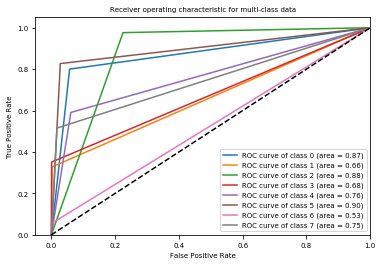

model beign processed =============================>  RandomForestClassifier   <===========================
Results: 
Top 1 Accuracy Rate =  30.9
Top 3 Accuracy Rate =  67.4
ROC-AUC score of the model   : 0.727323596674181
F1 Score                     : 0.5077947964143628

Precision                    : 0.5939112659259138

Recall                       : 0.506848051311537

Accuracy of the model        : 0.6736567452647855 

Confusion matrix             : 
[[1188    0   86    0  210    0    0   12]
 [   6    0  514    0   24    0    0    2]
 [   0    0 2610    0    0    0    0    0]
 [  52    0  455  208  148    0    0   42]
 [  61    0  563    0  806    0    0    0]
 [   2    0   44    0  213 1481    0   28]
 [  78    0  311    0  117    0    0   10]
 [  75    0  314    0   10    0    0  678]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1496
           1       0.00      0.00      0.00       546


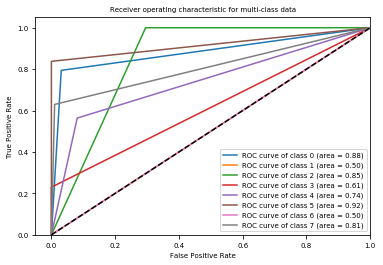

model beign processed =============================>  XGBClassifier   <===========================
Results: 
Top 1 Accuracy Rate =  32.5
Top 3 Accuracy Rate =  69.6
ROC-AUC score of the model   : 0.7530555255320085
F1 Score                     : 0.5723754639831569

Precision                    : 0.803359986572504

Recall                       : 0.5537992403015513

Accuracy of the model        : 0.696366447622729 

Confusion matrix             : 
[[1255    1  158    1   17   17    0   47]
 [  52  151  279    0   17   38    0    9]
 [   6    0 2582    0   15    1    0    6]
 [  66    0  290  336   98   42    0   73]
 [ 115    5  438    2  816   50    0    4]
 [  36    4   43    1  128 1498    0   58]
 [ 113    3  237    0  103   27    9   24]
 [  83    2  248    1  140   44    0  559]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1496
           1       0.91      0.28      0.42       546
         

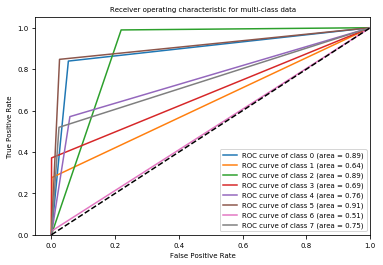

model beign processed =============================>  LGBMClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  32.300000000000004
Top 3 Accuracy Rate =  70.0
ROC-AUC score of the model   : 0.7632310815458387
F1 Score                     : 0.597991634162224

Precision                    : 0.7647099086886462

Recall                       : 0.5730901233398058

Accuracy of the model        : 0.700231928875145 

Confusion matrix             : 
[[1202    7  176    5   21   45    0   40]
 [  49  178  239    1   19   50    0   10]
 [  24    2 2544    2   24    3    0   11]
 [  58    5  250  374  105   48    1   64]
 [ 121   16  372    8  826   75    2   10]
 [  55    7   60    2  146 1458    1   39]
 [ 106   13  180    3  103   39   48   24]
 [  82   10  187    4  120   57    1  616]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1496
           1       0.75      0.33      0.45      

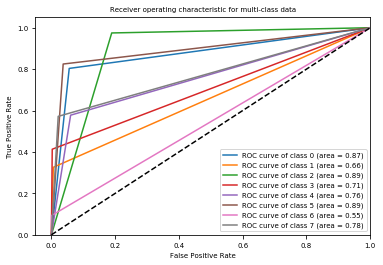

model beign processed =============================>  AdaBoostClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  31.900000000000002
Top 3 Accuracy Rate =  68.8
ROC-AUC score of the model   : 0.750432027866979
F1 Score                     : 0.5686970473601973

Precision                    : 0.7840819513048249

Recall                       : 0.5499161549712716

Accuracy of the model        : 0.6876691148047932 

Confusion matrix             : 
[[1210    7  200    3   17   19    0   40]
 [  44  180  269    0   18   28    0    7]
 [  14    0 2559    0   10    0    0   27]
 [  83    7  337  296   93   30    0   59]
 [ 112   14  424    4  836   33    0    7]
 [  49   11   70    2  124 1463    0   49]
 [ 121    9  237    0   98   17   10   24]
 [  83    7  240    2  145   38    0  562]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.71      0.81      0.75      1496
           1       0.77      0.33      0.46 

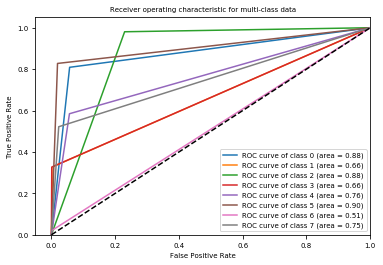

model beign processed =============================>  GradientBoostingClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  32.6
Top 3 Accuracy Rate =  69.69999999999999
ROC-AUC score of the model   : 0.7586377012121774
F1 Score                     : 0.5889472191616502

Precision                    : 0.7806262252893319

Recall                       : 0.5646123028202275

Accuracy of the model        : 0.6971395438732122 

Confusion matrix             : 
[[1229    3  175    3   19   26    0   41]
 [  52  184  236    0   19   48    0    7]
 [  12    0 2574    0   18    2    0    4]
 [  66    2  266  349  101   51    2   68]
 [ 118    8  403    3  827   65    0    6]
 [  51    6   58    3  137 1459    1   53]
 [ 103    4  212    2  103   35   33   24]
 [  86    9  227    3  147   46    0  559]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.72      0.82      0.77      1496
           1       0.85      0.34   

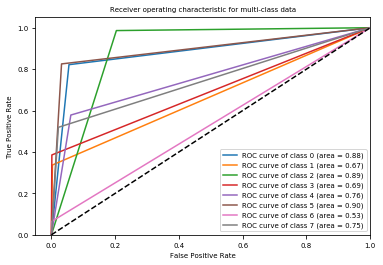

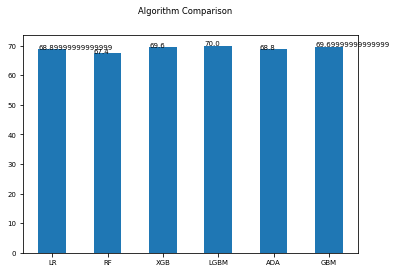

################################ features_selected ##################################>>>> 2
model beign processed =============================> LogisticRegression   <===========================
Results: 
Top 1 Accuracy Rate =  35.199999999999996
Top 3 Accuracy Rate =  71.0
ROC-AUC score of the model   : 0.7733688041081097
F1 Score                     : 0.6239921875319676

Precision                    : 0.7989758117812038

Recall                       : 0.5920733603710461

Accuracy of the model        : 0.709702357943564 

Confusion matrix             : 
[[1253    1  113    1   32   65    2   29]
 [  30  236  214    0   16   43    0    7]
 [   8    0 2565    0   13   12    0   12]
 [  79    1  264  360   73   90    0   38]
 [ 135    8  314    7  881   75    0   10]
 [  83    6  167    5  102 1375    0   30]
 [ 106    4  185    1   98   37   66   19]
 [  83    6  185    2  113   78    2  608]]

Classification report        : 
              precision    recall  f1-score   support

      

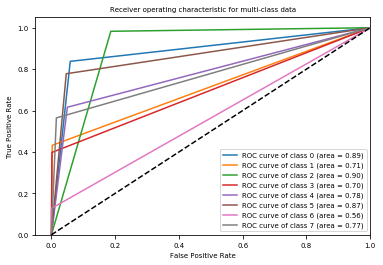

model beign processed =============================>  RandomForestClassifier   <===========================
Results: 
Top 1 Accuracy Rate =  33.0
Top 3 Accuracy Rate =  68.30000000000001
ROC-AUC score of the model   : 0.7286782815624231
F1 Score                     : 0.505867793180322

Precision                    : 0.603531249479738

Recall                       : 0.5084145320734776

Accuracy of the model        : 0.6831271743332045 

Confusion matrix             : 
[[1337    0   80    0   61    7    0   11]
 [   0    0  457    0   20   69    0    0]
 [   0    0 2609    0    1    0    0    0]
 [   4    0  520  167  101   81    0   32]
 [   4    0  522    0  825   79    0    0]
 [   1    0   59    0  128 1560    0   20]
 [  13    0  356    0  109   28    0   10]
 [  12    0  324    0  111   59    0  571]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1496
           1       0.00      0.00      0.

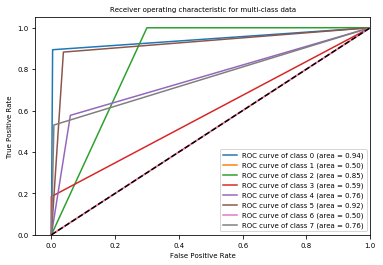

model beign processed =============================>  XGBClassifier   <===========================
Results: 
Top 1 Accuracy Rate =  36.3
Top 3 Accuracy Rate =  71.8
ROC-AUC score of the model   : 0.7757957761669769
F1 Score                     : 0.6249922553596816

Precision                    : 0.8152736413272257

Recall                       : 0.5957026785260324

Accuracy of the model        : 0.7181097796675686 

Confusion matrix             : 
[[1266    0  104    2   25   50    0   49]
 [  37  212  217    0   12   52    0   16]
 [   0    0 2581    0    9   11    0    9]
 [  46    1  263  392   62   82    0   59]
 [ 122    0  345    2  862   83    0   16]
 [  57    1  164    0   96 1402    0   48]
 [  98    3  197    1   96   40   48   33]
 [  72    3  166    2  108   57    1  668]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.75      0.85      0.79      1496
           1       0.96      0.39      0.55       546
       

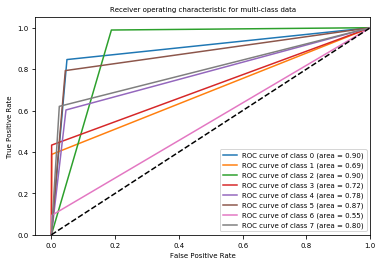

model beign processed =============================>  LGBMClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  37.0
Top 3 Accuracy Rate =  71.89999999999999
ROC-AUC score of the model   : 0.7815077593429655
F1 Score                     : 0.6379943297437857

Precision                    : 0.7772162416439856

Recall                       : 0.6065910549647864

Accuracy of the model        : 0.7187862388867414 

Confusion matrix             : 
[[1252    6  122    6   16   46    1   47]
 [  59  206  198    1   12   53    1   16]
 [  11    2 2548    1   19   11    2   16]
 [  58    2  214  425   61   90    1   54]
 [ 136   11  300   11  874   85    2   11]
 [ 100    7  156    4   96 1361    5   39]
 [  90   10  145    3   86   49   94   39]
 [  70    8  141    7  103   70    0  678]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.70      0.84      0.77      1496
           1       0.82      0.38      0.52     

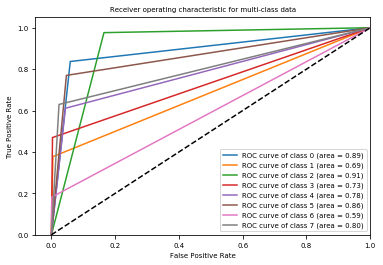

model beign processed =============================>  AdaBoostClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  35.199999999999996
Top 3 Accuracy Rate =  70.19999999999999
ROC-AUC score of the model   : 0.7702246710428544
F1 Score                     : 0.6140925706815231

Precision                    : 0.7798427827253362

Recall                       : 0.5868733870108432

Accuracy of the model        : 0.7020680324700426 

Confusion matrix             : 
[[1179    0  167   10   33   70    0   37]
 [  24  242  199    1   18   46    0   16]
 [   4    0 2549    1   19   15    0   22]
 [  59    2  286  369   63   77    0   49]
 [ 124   15  292   11  886   83    0   19]
 [  74   22  186    8   96 1339    0   43]
 [ 100    7  193    4   93   37   51   31]
 [  66    9  158    7  120   66    1  650]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1496
           1       0.81      0

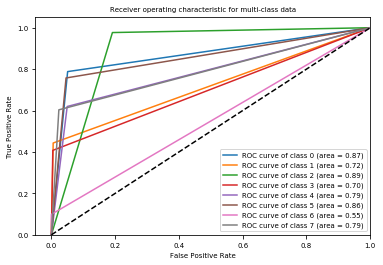

model beign processed =============================>  GradientBoostingClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  36.5
Top 3 Accuracy Rate =  71.8
ROC-AUC score of the model   : 0.77874050168495
F1 Score                     : 0.6328556464606497

Precision                    : 0.7910344696883658

Recall                       : 0.6013763023113113

Accuracy of the model        : 0.7181097796675686 

Confusion matrix             : 
[[1251    1  107    2   31   60    0   44]
 [  35  219  213    0   15   52    1   11]
 [   3    0 2575    0    8    9    2   13]
 [  54    4  242  407   61   82    0   55]
 [ 142    7  323    5  854   87    0   12]
 [  80    5  147    1   99 1396    1   39]
 [  97   10  173    2   95   37   73   29]
 [  78    5  158    5  108   63    4  656]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.72      0.84      0.77      1496
           1       0.87      0.40      0.55       5

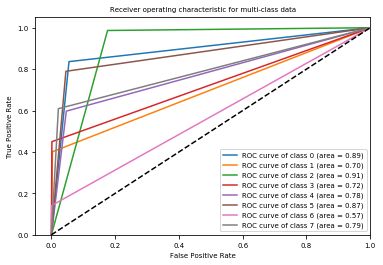

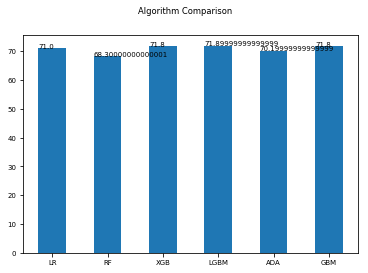

################################ features_selected ##################################>>>> 3
model beign processed =============================> LogisticRegression   <===========================
Results: 
Top 1 Accuracy Rate =  35.5
Top 3 Accuracy Rate =  70.89999999999999
ROC-AUC score of the model   : 0.774237610309513
F1 Score                     : 0.6275314900221725

Precision                    : 0.7992628267068257

Recall                       : 0.5939480127829646

Accuracy of the model        : 0.709219172787012 

Confusion matrix             : 
[[1221    1  149    2   33   61    1   28]
 [  26  246  207    0   16   44    1    6]
 [   8    0 2567    0   15   10    0   10]
 [  77    1  261  365   74   88    0   39]
 [ 135    7  307    5  890   75    1   10]
 [  90    5  169    4  102 1368    1   29]
 [  94    4  194    1   97   38   68   20]
 [  78    4  185    2  110   82    2  614]]

Classification report        : 
              precision    recall  f1-score   support

        

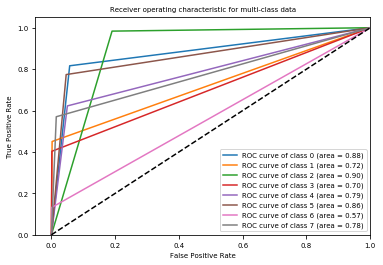

model beign processed =============================>  RandomForestClassifier   <===========================
Results: 
Top 1 Accuracy Rate =  33.0
Top 3 Accuracy Rate =  67.5
ROC-AUC score of the model   : 0.727269308205877
F1 Score                     : 0.5021834066007023

Precision                    : 0.5868351038002058

Recall                       : 0.5063023328539629

Accuracy of the model        : 0.6753962118283726 

Confusion matrix             : 
[[1197    0   71    0  210    7    0   11]
 [   3    0  457    0   26   60    0    0]
 [   0    0 2607    0    3    0    0    0]
 [  20    0  464  184  133   71    0   33]
 [  56    0  493    0  802   79    0    0]
 [   2    0   46    0  170 1528    0   22]
 [  53    0  310    0  116   28    0    9]
 [  54    0  282    0   17   53    0  671]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1496
           1       0.00      0.00      0.00       546

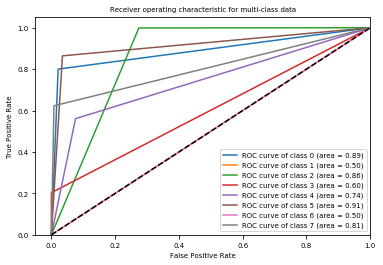

model beign processed =============================>  XGBClassifier   <===========================
Results: 
Top 1 Accuracy Rate =  36.4
Top 3 Accuracy Rate =  71.7
ROC-AUC score of the model   : 0.7757057673076486
F1 Score                     : 0.6240116771078861

Precision                    : 0.8156546201679705

Recall                       : 0.5956729219925756

Accuracy of the model        : 0.717240046385775 

Confusion matrix             : 
[[1279    0   91    2   23   51    0   50]
 [  28  223  221    0   13   48    0   13]
 [   1    0 2576    0   10   13    0   10]
 [  58    1  258  378   62   91    0   57]
 [ 116    5  344    3  864   85    0   13]
 [  60    2  178    1   97 1386    0   44]
 [  90    2  205    1   97   43   44   34]
 [  64    2  168    3  110   58    0  672]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1496
           1       0.95      0.41      0.57       546
        

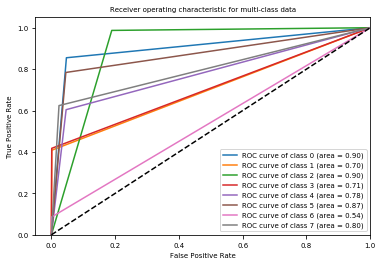

model beign processed =============================>  LGBMClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  36.9
Top 3 Accuracy Rate =  72.1
ROC-AUC score of the model   : 0.783584488746891
F1 Score                     : 0.6420359450354802

Precision                    : 0.7776244180255016

Recall                       : 0.6104562839681911

Accuracy of the model        : 0.7206223424816389 

Confusion matrix             : 
[[1220    6  143    4   15   54    1   53]
 [  58  222  192    1   11   46    2   14]
 [   9    2 2552    1   15   10    2   19]
 [  62    2  195  445   59   85    1   56]
 [ 135   10  306    8  872   84    2   13]
 [  91   11  137    7   96 1381    4   41]
 [  91    9  151    5   87   47   90   36]
 [  67    9  148    6  101   71    0  675]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.70      0.82      0.76      1496
           1       0.82      0.41      0.54       546
        

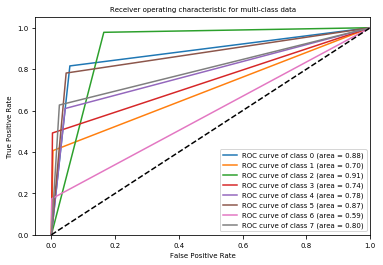

model beign processed =============================>  AdaBoostClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  35.3
Top 3 Accuracy Rate =  70.19999999999999
ROC-AUC score of the model   : 0.7711400746500519
F1 Score                     : 0.6184234050254894

Precision                    : 0.7953277721098618

Recall                       : 0.5887750733264847

Accuracy of the model        : 0.7023579435639737 

Confusion matrix             : 
[[1218    2  142    4   26   63    0   41]
 [  27  256  186    0   16   43    0   18]
 [   7    0 2544    1   19   14    0   25]
 [  70    4  280  343   64   89    0   55]
 [ 104    4  325   11  893   78    0   15]
 [  83    8  212    8   96 1316    0   45]
 [  96    2  201    2   94   34   56   31]
 [  67    4  170    7  119   68    0  642]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1496
           1       0.91      0.47      0.62 

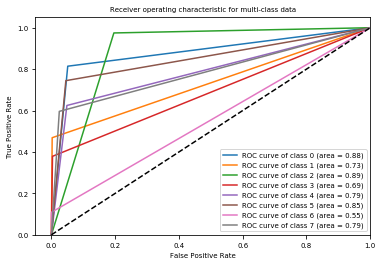

model beign processed =============================>  GradientBoostingClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  36.6
Top 3 Accuracy Rate =  72.1
ROC-AUC score of the model   : 0.7816190254067139
F1 Score                     : 0.6391291412076416

Precision                    : 0.7959179427111952

Recall                       : 0.6067090633334082

Accuracy of the model        : 0.7209122535755702 

Confusion matrix             : 
[[1252    5  104    5   28   56    0   46]
 [  36  228  205    0   14   50    1   12]
 [   6    0 2572    0    9    8    0   15]
 [  57    3  233  412   62   84    0   54]
 [ 123    7  333    2  865   86    0   14]
 [  80    9  148    1   98 1391    2   39]
 [  81    8  173    4   98   45   79   28]
 [  71    3  162    7  106   65    2  661]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1496
           1       0.87      0.42      0.56      

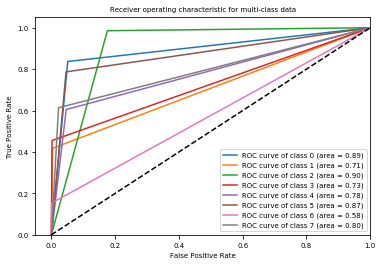

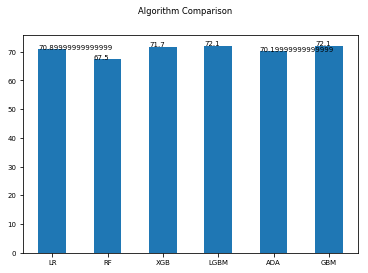

################################ features_selected ##################################>>>> 4
model beign processed =============================> LogisticRegression   <===========================
Results: 
Top 1 Accuracy Rate =  35.6
Top 3 Accuracy Rate =  71.0
ROC-AUC score of the model   : 0.7745242999513211
F1 Score                     : 0.6274641251576731

Precision                    : 0.7984701936937296

Recall                       : 0.5943483195972308

Accuracy of the model        : 0.7103788171627368 

Confusion matrix             : 
[[1238    1  128    4   33   62    2   28]
 [  33  245  206    0   16   40    0    6]
 [   8    0 2567    0   15   10    0   10]
 [  77    0  271  364   68   87    0   38]
 [ 131    6  307    6  895   73    1   11]
 [  84    4  178    4  101 1366    2   29]
 [  96    4  197    0   96   37   66   20]
 [  80    5  185    3  110   82    2  610]]

Classification report        : 
              precision    recall  f1-score   support

           0       

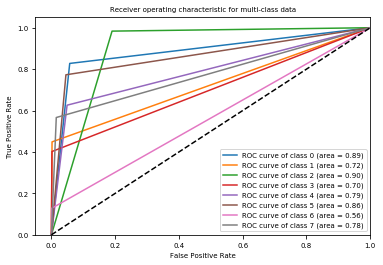

model beign processed =============================>  RandomForestClassifier   <===========================
Results: 
Top 1 Accuracy Rate =  33.6
Top 3 Accuracy Rate =  68.7
ROC-AUC score of the model   : 0.7311862408141838
F1 Score                     : 0.5076744312101917

Precision                    : 0.5957073175342068

Recall                       : 0.5125276582979116

Accuracy of the model        : 0.6867993815229996 

Confusion matrix             : 
[[1335    0   82    0   64    8    0    7]
 [   5    0  462    0   20   59    0    0]
 [   0    0 2608    0    2    0    0    0]
 [  27    0  478  195  100   77    0   28]
 [  47    0  483    0  822   78    0    0]
 [   2    0   49    0  115 1585    0   17]
 [  61    0  308    0  112   28    0    7]
 [  65    0  275    0  118   57    0  562]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1496
           1       0.00      0.00      0.00       54

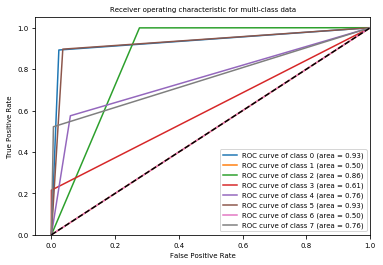

model beign processed =============================>  XGBClassifier   <===========================
Results: 
Top 1 Accuracy Rate =  36.3
Top 3 Accuracy Rate =  71.6
ROC-AUC score of the model   : 0.7744759740223244
F1 Score                     : 0.6219167518986668

Precision                    : 0.8160981640219174

Recall                       : 0.5934047224215365

Accuracy of the model        : 0.7161770390413607 

Confusion matrix             : 
[[1277    0   93    3   24   51    0   48]
 [  29  216  224    0   13   48    0   16]
 [   2    0 2576    0   11   11    0   10]
 [  55    1  272  372   63   88    0   54]
 [ 115    2  347    1  862   88    0   15]
 [  60    2  168    2   98 1393    0   45]
 [  93    2  207    0   96   40   45   33]
 [  63    4  172    3  108   57    0  670]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1496
           1       0.95      0.40      0.56       546
       

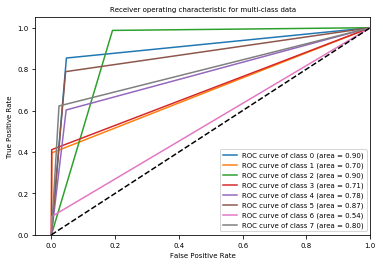

model beign processed =============================>  LGBMClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  36.8
Top 3 Accuracy Rate =  72.2
ROC-AUC score of the model   : 0.7851871400613377
F1 Score                     : 0.6464397153690769

Precision                    : 0.7814826277937561

Recall                       : 0.6135099957421122

Accuracy of the model        : 0.7218786238886742 

Confusion matrix             : 
[[1230    4  138    3   16   54    1   50]
 [  42  230  197    0   11   46    3   17]
 [   9    3 2552    0   18   12    1   15]
 [  62    4  205  441   60   81    1   51]
 [ 136   11  309    7  866   84    3   14]
 [  91   13  137    7   96 1381    2   41]
 [  88    6  151    4   88   47   97   35]
 [  67    9  146    4  104   73    1  673]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.71      0.82      0.76      1496
           1       0.82      0.42      0.56       546
       

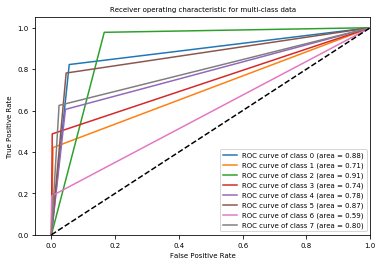

model beign processed =============================>  AdaBoostClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  35.4
Top 3 Accuracy Rate =  70.1
ROC-AUC score of the model   : 0.7692627256892218
F1 Score                     : 0.6146281093360146

Precision                    : 0.8019965442857251

Recall                       : 0.585254251003019

Accuracy of the model        : 0.7014882102821801 

Confusion matrix             : 
[[1216    1  142    3   27   66    0   41]
 [  14  249  208    1   16   42    0   16]
 [   6    0 2551    0   19   13    0   21]
 [  71    1  276  354   65   87    0   51]
 [ 111    1  336   12  882   77    0   11]
 [  83    3  211    8   98 1323    0   42]
 [ 103    3  206    1   95   37   44   27]
 [  65    2  174    8  119   69    0  640]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1496
           1       0.96      0.46      0.62       546
    

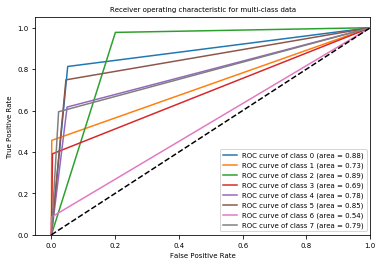

model beign processed =============================>  GradientBoostingClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  36.5
Top 3 Accuracy Rate =  72.1
ROC-AUC score of the model   : 0.7808478768597353
F1 Score                     : 0.6368984655052328

Precision                    : 0.7931347300570133

Recall                       : 0.6052122648003023

Accuracy of the model        : 0.7205257054503286 

Confusion matrix             : 
[[1258    4   98    3   23   57    1   52]
 [  37  222  211    1   14   48    1   12]
 [   5    2 2575    0    8    9    0   11]
 [  60    3  226  413   58   86    0   59]
 [ 121    8  339    3  857   88    0   14]
 [  79    8  148    3   99 1390    2   39]
 [  86    8  173    2   94   44   77   32]
 [  65    4  160    4  110   68    2  664]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.74      0.84      0.78      1496
           1       0.86      0.41      0.55      

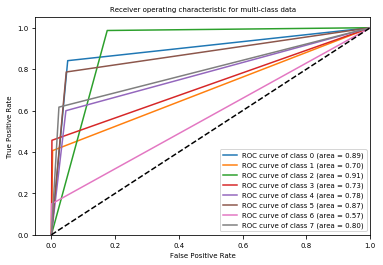

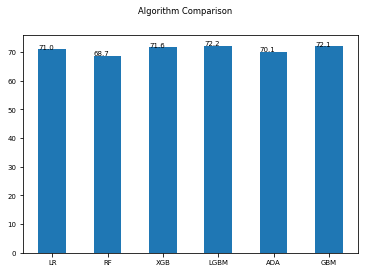

################################ features_selected ##################################>>>> 5
model beign processed =============================> LogisticRegression   <===========================
Results: 
Top 1 Accuracy Rate =  35.199999999999996
Top 3 Accuracy Rate =  70.6
ROC-AUC score of the model   : 0.7713234281650618
F1 Score                     : 0.6192919624490173

Precision                    : 0.7961754480182655

Recall                       : 0.5885211638246636

Accuracy of the model        : 0.7056436026285272 

Confusion matrix             : 
[[1239    1  121    1   35   64    2   33]
 [  29  244  208    0   17   41    0    7]
 [   5    0 2575    0    4   14    0   12]
 [  82    1  255  366   76   86    0   39]
 [ 153    5  290    7  888   79    0    8]
 [ 111    4  177    5  104 1337    0   30]
 [ 118    5  179    1   97   38   58   20]
 [  94    5  183    2  117   79    2  595]]

Classification report        : 
              precision    recall  f1-score   support

     

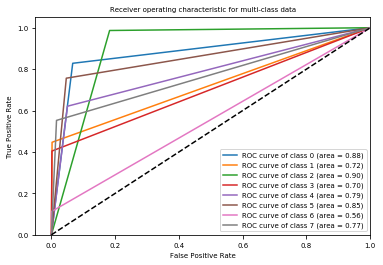

model beign processed =============================>  RandomForestClassifier   <===========================
Results: 
Top 1 Accuracy Rate =  31.900000000000002
Top 3 Accuracy Rate =  67.80000000000001
ROC-AUC score of the model   : 0.725649981008538
F1 Score                     : 0.49917133472327185

Precision                    : 0.600621640819745

Recall                       : 0.503146462383284

Accuracy of the model        : 0.6782953227676846 

Confusion matrix             : 
[[1342    0   72    0   56    8    0   18]
 [   0    0  468    0   21   57    0    0]
 [   0    0 2605    0    5    0    0    0]
 [   3    0  554  146  111   61    0   30]
 [  23    0  544    0  794   69    0    0]
 [   0    0   57    0  131 1560    0   20]
 [  17    0  352    0  111   25    0   11]
 [  10    0  325    0  115   55    0  572]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1496
           1       0.00    

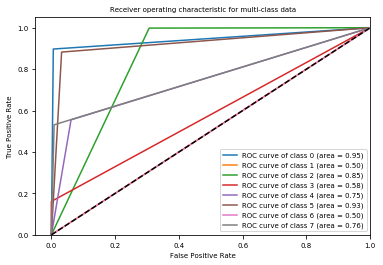

model beign processed =============================>  XGBClassifier   <===========================
Results: 
Top 1 Accuracy Rate =  36.3
Top 3 Accuracy Rate =  71.2
ROC-AUC score of the model   : 0.771769808774668
F1 Score                     : 0.6162631425976397

Precision                    : 0.806327148086087

Recall                       : 0.5885819437238284

Accuracy of the model        : 0.7116350985697719 

Confusion matrix             : 
[[1260    0  103    1   24   54    0   54]
 [  36  215  215    0   13   53    0   14]
 [   0    0 2587    1    4   11    0    7]
 [  51    1  262  385   60   88    0   58]
 [ 130    0  324    3  869   84    0   20]
 [  79    1  186    1   94 1363    0   44]
 [ 114    2  194    1   91   39   41   34]
 [  79    4  164    2  124   58    2  644]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.72      0.84      0.78      1496
           1       0.96      0.39      0.56       546
         

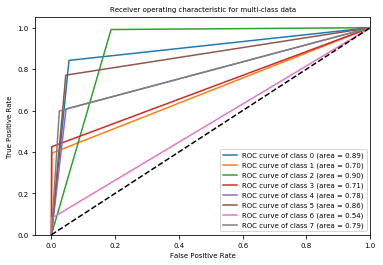

model beign processed =============================>  LGBMClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  36.7
Top 3 Accuracy Rate =  71.6
ROC-AUC score of the model   : 0.7802595424799594
F1 Score                     : 0.6359805575002802

Precision                    : 0.766347627581126

Recall                       : 0.6045509724727711

Accuracy of the model        : 0.7156938538848087 

Confusion matrix             : 
[[1227    6  133    4   17   53    2   54]
 [  58  217  196    0   13   47    2   13]
 [  18    2 2546    0   19    9    2   14]
 [  53    3  216  425   59   93    1   55]
 [ 127    9  293   11  895   80    6    9]
 [ 107   10  159    3   95 1348    7   39]
 [ 101    9  142    3   86   48   90   37]
 [  79    8  145    5  108   71    3  658]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1496
           1       0.82      0.40      0.54       546
        

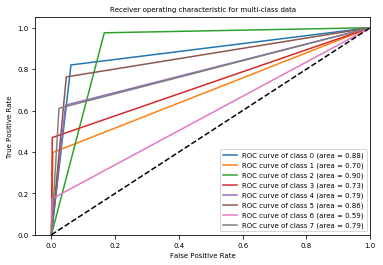

model beign processed =============================>  AdaBoostClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  34.9
Top 3 Accuracy Rate =  69.8
ROC-AUC score of the model   : 0.7691483847726674
F1 Score                     : 0.6116320483072527

Precision                    : 0.7708189295009396

Recall                       : 0.5851691830736822

Accuracy of the model        : 0.697816003092385 

Confusion matrix             : 
[[1191    0  149    8   34   72    0   42]
 [  32  256  181    2   18   41    0   16]
 [   2    0 2555    1   13   17    1   21]
 [  70    3  271  353   67   91    0   50]
 [ 147   21  277   10  876   83    0   16]
 [ 101   23  192    9   98 1302    0   43]
 [ 109    9  172    2   95   39   59   31]
 [  85   10  156    3  124   69    1  629]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1496
           1       0.80      0.47      0.59       546
    

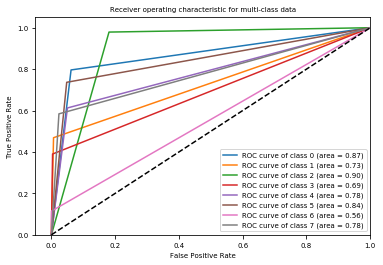

model beign processed =============================>  GradientBoostingClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  36.4
Top 3 Accuracy Rate =  71.39999999999999
ROC-AUC score of the model   : 0.7759904137967933
F1 Score                     : 0.627269643395052

Precision                    : 0.7847207074069913

Recall                       : 0.596418228835104

Accuracy of the model        : 0.7142442984151527 

Confusion matrix             : 
[[1248    1  104    3   27   60    0   53]
 [  38  212  216    0   14   51    1   14]
 [   2    0 2585    0    1    8    2   12]
 [  51    3  246  400   64   84    0   57]
 [ 153    5  295    3  869   90    0   15]
 [  98    8  164    2   97 1357    3   39]
 [ 100    6  172    2   92   41   72   31]
 [  84    5  156    4  107   68    5  648]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.70      0.83      0.76      1496
           1       0.88      0.39     

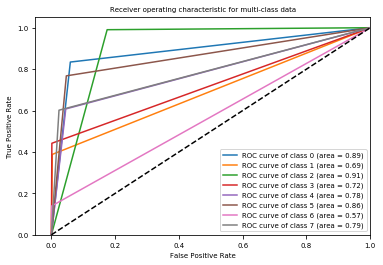

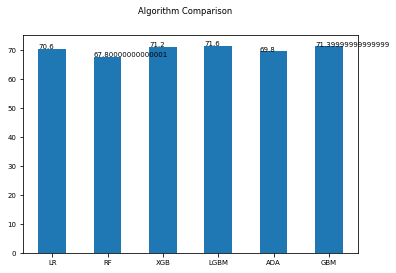

################################ features_selected ##################################>>>> 6
model beign processed =============================> LogisticRegression   <===========================
Results: 
Top 1 Accuracy Rate =  35.6
Top 3 Accuracy Rate =  70.8
ROC-AUC score of the model   : 0.7732063501311789
F1 Score                     : 0.6245420680675926

Precision                    : 0.7978620767667588

Recall                       : 0.5920279216998865

Accuracy of the model        : 0.7081561654425976 

Confusion matrix             : 
[[1225    1  143    4   32   60    0   31]
 [  25  244  212    0   16   42    1    6]
 [   9    0 2564    0   13   13    0   11]
 [  79    1  260  362   76   88    0   39]
 [ 131    6  306    6  892   77    1   11]
 [  93    5  167    4  102 1365    1   31]
 [  99    4  195    1   96   37   64   20]
 [  74    5  186    3  114   81    2  612]]

Classification report        : 
              precision    recall  f1-score   support

           0       

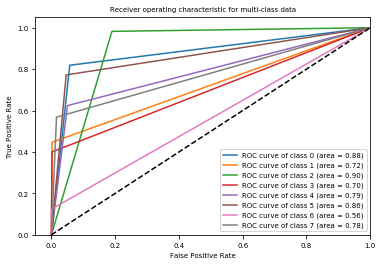

model beign processed =============================>  RandomForestClassifier   <===========================
Results: 
Top 1 Accuracy Rate =  32.800000000000004
Top 3 Accuracy Rate =  68.4
ROC-AUC score of the model   : 0.7298809920480713
F1 Score                     : 0.5064164363108794

Precision                    : 0.595544483004234

Recall                       : 0.5103831233260804

Accuracy of the model        : 0.6843834557402396 

Confusion matrix             : 
[[1325    0   92    0   58    7    0   14]
 [   3    0  467    0   20   56    0    0]
 [   0    0 2610    0    0    0    0    0]
 [  29    0  498  191   96   59    0   32]
 [  45    0  493    0  826   66    0    0]
 [   2    0   49    0  130 1568    0   19]
 [  59    0  312    0  110   26    0    9]
 [  58    0  297    0  116   44    0  562]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1496
           1       0.00      0.00      

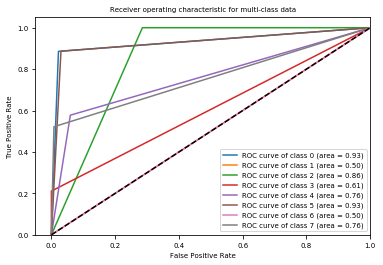

model beign processed =============================>  XGBClassifier   <===========================
Results: 
Top 1 Accuracy Rate =  36.3
Top 3 Accuracy Rate =  71.7
ROC-AUC score of the model   : 0.7747898208786345
F1 Score                     : 0.6222482279745729

Precision                    : 0.8154667946905856

Recall                       : 0.5939153343259435

Accuracy of the model        : 0.716756861229223 

Confusion matrix             : 
[[1280    0   86    2   26   55    0   47]
 [  30  217  220    0   14   51    0   14]
 [   2    0 2577    0   10   13    0    8]
 [  58    1  275  362   62   92    0   55]
 [ 117    3  342    2  863   89    0   14]
 [  59    3  166    2   98 1396    0   44]
 [  92    3  208    0   98   38   47   30]
 [  62    3  166    3  110   58    0  675]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1496
           1       0.94      0.40      0.56       546
        

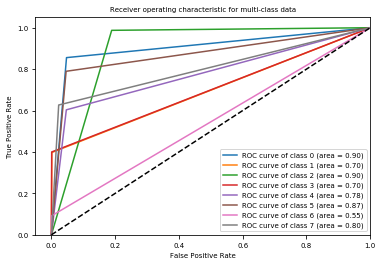

model beign processed =============================>  LGBMClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  36.8
Top 3 Accuracy Rate =  72.0
ROC-AUC score of the model   : 0.7824903469042959
F1 Score                     : 0.6390465215339969

Precision                    : 0.7768318397512923

Recall                       : 0.6083948920547665

Accuracy of the model        : 0.7198492462311558 

Confusion matrix             : 
[[1230    5  135    4   15   55    1   51]
 [  53  218  195    2   12   49    2   15]
 [   9    3 2556    0   16    9    0   17]
 [  58    2  202  443   57   87    1   55]
 [ 129   17  317    8  857   83    3   16]
 [  95   12  136    4   93 1383    1   44]
 [  86   14  152    3   88   48   87   38]
 [  69    8  146    6  102   70    1  675]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.71      0.82      0.76      1496
           1       0.78      0.40      0.53       546
       

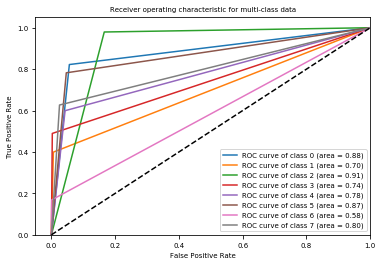

model beign processed =============================>  AdaBoostClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  35.699999999999996
Top 3 Accuracy Rate =  70.39999999999999
ROC-AUC score of the model   : 0.7687298581806146
F1 Score                     : 0.6134531442688924

Precision                    : 0.8006888169275226

Recall                       : 0.5838330744956146

Accuracy of the model        : 0.7037108620023192 

Confusion matrix             : 
[[1232    0  128    4   28   64    0   40]
 [  24  223  224    1   16   42    0   16]
 [   9    0 2548    1   15   14    0   23]
 [  74    4  288  343   60   86    0   50]
 [ 105    2  320    9  895   85    0   14]
 [  79    8  188    6   94 1353    0   40]
 [  90    3  213    2   93   35   53   27]
 [  65    2  179    5  122   69    0  635]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.73      0.82      0.78      1496
           1       0.92      0

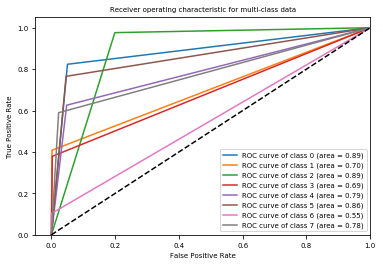

model beign processed =============================>  GradientBoostingClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  36.5
Top 3 Accuracy Rate =  72.0
ROC-AUC score of the model   : 0.7802164734368736
F1 Score                     : 0.6350691658182183

Precision                    : 0.788571560170938

Recall                       : 0.6040096221632549

Accuracy of the model        : 0.7200425202937766 

Confusion matrix             : 
[[1261    4   96    5   22   56    1   51]
 [  36  219  212    1   13   51    0   14]
 [   4    1 2573    1    8   11    1   11]
 [  61    3  229  412   59   83    0   58]
 [ 125    9  337    6  852   87    1   13]
 [  74    9  144    3   99 1397    3   39]
 [  85    8  176    2   95   45   76   29]
 [  67    5  161    7  110   65    1  661]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.74      0.84      0.79      1496
           1       0.85      0.40      0.54       

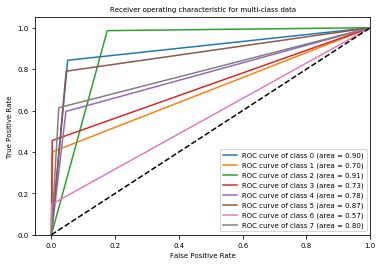

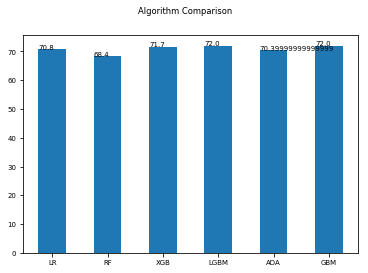

################################ features_selected ##################################>>>> 7
model beign processed =============================> LogisticRegression   <===========================
Results: 
Top 1 Accuracy Rate =  31.8
Top 3 Accuracy Rate =  69.19999999999999
ROC-AUC score of the model   : 0.7559945707517134
F1 Score                     : 0.5860321551635777

Precision                    : 0.777055018282848

Recall                       : 0.5600859743244796

Accuracy of the model        : 0.6915345960572091 

Confusion matrix             : 
[[1208    3  163    5   43   45    0   29]
 [  52  156  275    0   24   33    1    5]
 [  18    1 2545    0   21    5    0   20]
 [  87    0  276  314  123   58    0   47]
 [ 130    4  322    6  882   75    2    9]
 [  61    7  111    4  134 1406    1   44]
 [ 113    2  195    1  106   23   54   22]
 [  83    6  196    6  143   50    2  591]]

Classification report        : 
              precision    recall  f1-score   support

       

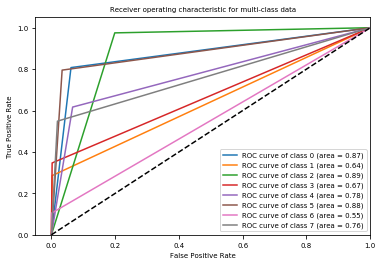

model beign processed =============================>  RandomForestClassifier   <===========================
Results: 
Top 1 Accuracy Rate =  30.0
Top 3 Accuracy Rate =  67.60000000000001
ROC-AUC score of the model   : 0.7277322655594722
F1 Score                     : 0.5106979951327331

Precision                    : 0.6056596028032141

Recall                       : 0.5076502626558165

Accuracy of the model        : 0.6757827599536143 

Confusion matrix             : 
[[1179    0   74    0  230    0    0   13]
 [   1    0  519    0   26    0    0    0]
 [   0    0 2610    0    0    0    0    0]
 [  16    0  517  187  146    1    0   38]
 [  32    0  578    0  820    0    0    0]
 [   1    0   37    0  195 1507    0   28]
 [  33    0  352    0  116    0    0   15]
 [  26    0  355    0    6    0    0  690]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1496
           1       0.00      0.00      

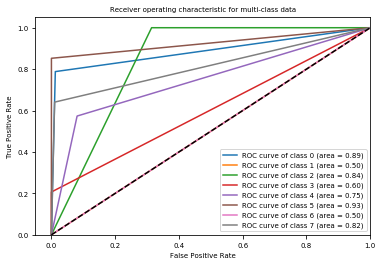

model beign processed =============================>  XGBClassifier   <===========================
Results: 
Top 1 Accuracy Rate =  33.300000000000004
Top 3 Accuracy Rate =  70.39999999999999
ROC-AUC score of the model   : 0.7583725569471322
F1 Score                     : 0.5802602532085159

Precision                    : 0.8048441311551715

Recall                       : 0.5630329013577287

Accuracy of the model        : 0.7040007730962505 

Confusion matrix             : 
[[1243    0  140    2   30   34    0   47]
 [  53  145  275    1   24   30    0   18]
 [   2    0 2581    0   17    2    0    8]
 [  55    2  300  330  101   53    0   64]
 [ 115    4  378    5  852   59    0   17]
 [  41    1   70    2  119 1480    0   55]
 [ 106    3  224    0  108   27   14   34]
 [  73    1  167    4  141   51    0  640]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1496
           1       0.93      0.27 

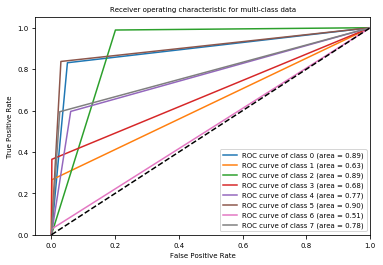

model beign processed =============================>  LGBMClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  33.6
Top 3 Accuracy Rate =  70.8
ROC-AUC score of the model   : 0.7714533737473259
F1 Score                     : 0.6163504351788751

Precision                    : 0.7639854710722795

Recall                       : 0.5881096361756978

Accuracy of the model        : 0.7083494395052184 

Confusion matrix             : 
[[1206    5  166    3   20   50    1   45]
 [  56  175  235    1   17   39    2   21]
 [  17    2 2523    1   30    9    0   28]
 [  62    4  241  393   88   48    3   66]
 [ 130    7  334    9  862   73    1   14]
 [  76    8   85    5  103 1433    3   55]
 [  98   11  159    4   94   36   78   36]
 [  66    7  143    8  132   58    3  660]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      1496
           1       0.80      0.32      0.46       546
       

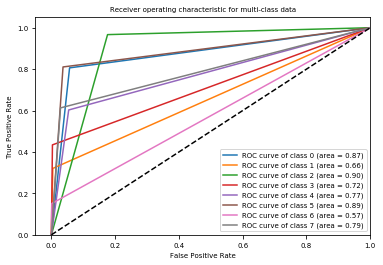

model beign processed =============================>  AdaBoostClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  31.7
Top 3 Accuracy Rate =  69.0
ROC-AUC score of the model   : 0.7542792178480127
F1 Score                     : 0.5751273422908896

Precision                    : 0.7707827149262181

Recall                       : 0.5566144952176557

Accuracy of the model        : 0.6904715887127948 

Confusion matrix             : 
[[1213    0  158    6   28   44    0   47]
 [  64  146  241    1   21   55    0   18]
 [  11    1 2547    0   16    3    0   32]
 [  86    3  283  329   76   68    0   60]
 [ 149    9  309    7  888   53    0   15]
 [  66   14  122    7  124 1368    0   67]
 [ 123    3  195    1   98   30   33   33]
 [  80    8  165   10  138   55    0  621]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      1496
           1       0.79      0.27      0.40       546
   

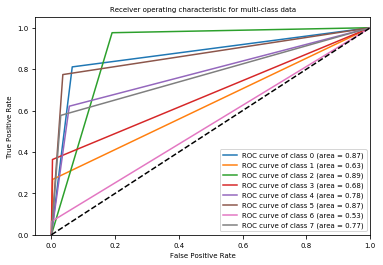

model beign processed =============================>  GradientBoostingClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  33.7
Top 3 Accuracy Rate =  70.39999999999999
ROC-AUC score of the model   : 0.7631291081654537
F1 Score                     : 0.5967215055883295

Precision                    : 0.7719180536128396

Recall                       : 0.5723284532789406

Accuracy of the model        : 0.7041940471588712 

Confusion matrix             : 
[[1228    5  146    7   27   36    0   47]
 [  52  158  259    1   21   40    2   13]
 [   6    0 2571    0   17    1    0   15]
 [  59    3  278  348   90   64    2   61]
 [ 123    9  355    6  852   70    0   15]
 [  52    4   82    2  123 1450    1   54]
 [ 104    8  185    2  105   33   51   28]
 [  72    4  167    8  139   56    2  629]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.72      0.82      0.77      1496
           1       0.83      0.29   

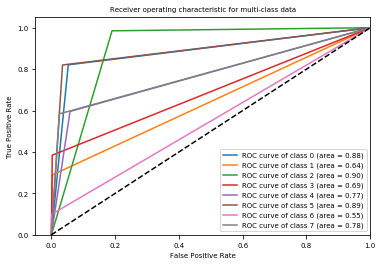

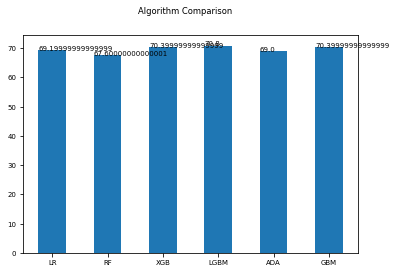

In [150]:
func_models_all(features_selected) 

### Among all the Feature selection techniques used XGBMClassifer selected variables were performing better than others 

##### Updating X_train and X_test with features selected from XGBClassifier

In [46]:
x_train=X_train[features_selected_xgb]
x_test=X_test[features_selected_xgb]

## 8.2 Performance Tuning of the Models to be used

### 8.2.1 Logistic Regression - Hyper parameter tuning

In [62]:
mod=model_selection.GridSearchCV(LogisticRegression(),param_grid={"penalty":["l1"],"C":np.random.uniform(0,120,2)})
mod.fit(x_train,Y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1'], 'C': array([103.18527, 103.3489 ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [63]:
mod.best_estimator_

LogisticRegression(C=103.3489010611569, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [69]:
log_tuned=LogisticRegression(C=103.3489010611569, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

### 8.2.2 Random Forest - Hyper parameter tuning

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, Y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   23.0s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   46.3s finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [67]:
rf_random.best_estimator_


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
rf_tuned= RandomForestClassifier(bootstrap=True, criterion='gini',max_depth=4, max_features='sqrt', min_samples_leaf=4, min_samples_split=5)

### 8.2.3 Gradient Boosting - Hyper parameter tuning

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = [50,100,150]
max_depth = [4,5,6]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

gb = GradientBoostingClassifier()

gf_tune = GridSearchCV(estimator = gb, param_grid = grid, cv = 2, verbose=2, n_jobs = -1)
gf_tune.fit(X_train, Y_train)

Fitting 2 folds for each of 81 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 47.0min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 150], 'max_depth': [4, 5, 6], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [28]:
gf_tune.best_params_

{'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [103]:
gbm_tuned = GradientBoostingClassifier(max_depth=4, n_estimators=100,min_samples_leaf=4,min_samples_split= 10)

### 8.2.4 Light Gradient Boosting - Hyper parameter tuning

In [74]:
# latest one 
from sklearn.model_selection import GridSearchCV
param_test = {
 'max_depth':[2,3,4,5,6],
 "learning_rate" : [0.01,0.05,0.1],
 "num_leaves": [300,900,1200],
 'min_child_weight':[4,5,6,7,8],
 'n_estimators' :[100,140,200]}
lg = LGBMClassifier()
gsearchlgbm = GridSearchCV(lg, n_jobs=-1, param_grid=param_test, cv = 3, verbose=5)
gsearchlgbm.fit(x_train,Y_train)


Fitting 3 folds for each of 675 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 50.6min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed: 65.9min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 84.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 110.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 131.9min
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed: 170.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6], 'learning_rate': [0.01, 0.05, 0.1], 'num_leaves': [300, 900, 1200], 'min_child_weight': [4, 5, 6, 7, 8], 'n_estimators': [100, 140, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [77]:
gsearchlgbm.best_estimator_


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.05, max_depth=6,
        min_child_samples=20, min_child_weight=4, min_split_gain=0.0,
        n_estimators=140, n_jobs=-1, num_leaves=300, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [78]:
lgbm_tuned=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.05, max_depth=6,
        min_child_samples=20, min_child_weight=4, n_estimators=140, n_jobs=-1, 
        num_leaves=300, subsample=1.0, subsample_for_bin=200000)

### 8.2.5 Extreme Gradient Boosting - Hyper parameter tuning

In [182]:
from sklearn.model_selection import GridSearchCV
param_test2 = {"max_depth": [10,30,50],

              "min_child_weight" : [1,3,6],

              "n_estimators": [200],

              "learning_rate": [0.05, 0.1,0.16],}
model = xgb.XGBClassifier()
grid_search = GridSearchCV(model, param_grid=param_test2, cv = 3, 

                                   verbose=10, n_jobs=-1)
gsearchxgbm .fit(X_train,Y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 12.1min finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 12.1min remaining:    0.0s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [6], 'min_child_weight': [3], 'n_estimators': [200], 'learning_rate': [0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [183]:
gsearchxgbm.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.05,
       max_delta_step=0, max_depth=6, min_child_weight=3, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [185]:
xgb_tuned = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1,  learning_rate=0.05,
       max_depth=6, min_child_weight=3, missing=None,
       n_estimators=200, n_jobs=1, 
       objective='multi:softprob')

### 8.2.6 Adaptive Boosting - Hyper parameter tuning

In [196]:
model = AdaBoostClassifier()

param_dist = {"n_estimators": [100,200],
              "learning_rate": [0.05, 0.1,0.16],}

grid_search_ada = GridSearchCV(model, param_grid=param_dist, cv = 3,verbose=10, n_jobs=-1)
grid_search_ada .fit(x_train,Y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:   41.5s remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:  1.1min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:  1.1min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:  1.5min remaining:   55.6s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  1.5min remaining:   34.0s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  1.5min remaining:   17.8s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1, 0.16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [198]:
grid_search_ada.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.16, n_estimators=200, random_state=None)

In [192]:
ada_tuned=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.16, n_estimators=200, random_state=None)

## 8.2 Accuracy on train sample

##### Among all models with XGBM features selected LGBM classifier is performing at par with all models

In [97]:
y_train_mod = Y_train.reset_index(drop=True)
x_train_mod = x_train.reset_index(drop=True)

Results: 
Top 1 Accuracy Rate =  36.1
Top 3 Accuracy Rate =  71.3
ROC-AUC score of the model   : 0.7752626593247924
F1 Score                     : 0.6298891890074285

Precision                    : 0.8080292040052268

Recall                       : 0.5955395796910343

Accuracy of the model        : 0.7130294025271194 

Confusion matrix             : 
[[ 4966     2   568    11   163   249     4   115]
 [  145   904   907     4    71   143     1    12]
 [   33     3 10260     1    48    41     4    55]
 [  276     4  1059  1539   288   298     0   167]
 [  535    17  1250    15  3725   334     2    30]
 [  355    12   672    11   388  5548     1   116]
 [  417    23   831     3   369   143   275    66]
 [  268    15   730    13   363   225     2  2296]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.71      0.82      0.76      6078
           1       0.92      0.41      0.57      2187
           2       0.63      0.98      0.7

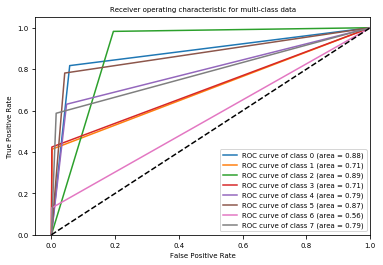

71.3

In [157]:
metric_calc(lr_tuned,x_train,Y_train, x_train_mod,y_train_mod)

Results: 
Top 1 Accuracy Rate =  34.300000000000004
Top 3 Accuracy Rate =  69.1
ROC-AUC score of the model   : 0.7336042215700012
F1 Score                     : 0.5142362301276727

Precision                    : 0.6004684983809644

Recall                       : 0.5168694994727097

Accuracy of the model        : 0.6906090696045034 

Confusion matrix             : 
[[ 5379     0   332     0   285    44     0    38]
 [   20     0  1866     0    82   218     0     1]
 [    0     0 10431     0    14     0     0     0]
 [   91     0  1927   844   409   288     0    72]
 [  221     0  1945     0  3449   293     0     0]
 [   26     0   162     0   472  6384     0    59]
 [  261     0  1330     0   399   112     0    25]
 [  240     0  1019     0   386   169     0  2098]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      6078
           1       0.00      0.00      0.00      2187
           2       0.55     

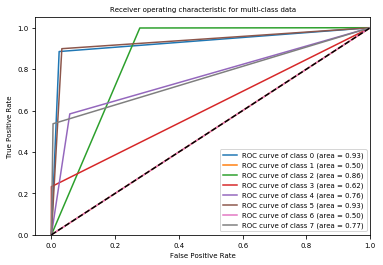

69.1

In [158]:
metric_calc(rf_tuned,x_train,Y_train, x_train_mod,y_train_mod)

Results: 
Top 1 Accuracy Rate =  37.1
Top 3 Accuracy Rate =  72.39999999999999
ROC-AUC score of the model   : 0.7811786321110528
F1 Score                     : 0.6344928097106606

Precision                    : 0.8198936415080005

Recall                       : 0.6055521568553663

Accuracy of the model        : 0.7243362083544732 

Confusion matrix             : 
[[ 5161     2   379     9    93   236     0   198]
 [  116   950   865     4    68   146     0    38]
 [    7     1 10323     1    42    39     0    32]
 [  199     5  1024  1592   269   316     0   226]
 [  503     8  1394    15  3583   349     1    55]
 [  264     5   609     7   360  5684     0   174]
 [  422    10   855     4   356   158   188   134]
 [  206     6   646    13   367   174     0  2500]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      6078
           1       0.96      0.43      0.60      2187
           2       0.64      

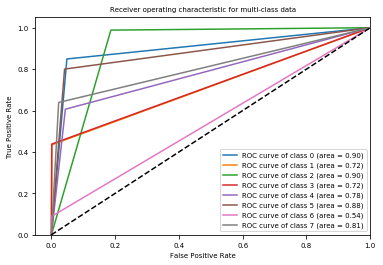

72.39999999999999

In [159]:
metric_calc(gbm_tuned,x_train,Y_train, x_train_mod,y_train_mod)

Results: 
Top 1 Accuracy Rate =  40.8
Top 3 Accuracy Rate =  77.10000000000001
ROC-AUC score of the model   : 0.8230144230663488
F1 Score                     : 0.7172106580897262

Precision                    : 0.8258478301699166

Recall                       : 0.6814333288509926

Accuracy of the model        : 0.771472059143292 

Confusion matrix             : 
[[ 5290     9   332    16    54   176     7   194]
 [  150  1241   614     4    63    83     4    28]
 [   33     6 10265     0    77    25     3    36]
 [  216     9   605  2135   231   217    10   208]
 [  531    36  1135    14  3860   286     8    38]
 [  305    30   410     8   318  5855     9   168]
 [  375    23   577    11   320   125   584   112]
 [  198    19   475    13   338   158     9  2702]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.75      0.87      0.80      6078
           1       0.90      0.57      0.70      2187
           2       0.71      0

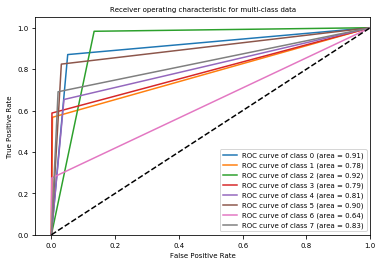

77.10000000000001

In [160]:
metric_calc(lgbm_tuned,x_train,Y_train, x_train_mod,y_train_mod)

Results: 
Top 1 Accuracy Rate =  35.9
Top 3 Accuracy Rate =  71.3
ROC-AUC score of the model   : 0.7768764381442506
F1 Score                     : 0.6278793582423889

Precision                    : 0.8087453669910744

Recall                       : 0.5987487225101809

Accuracy of the model        : 0.7127394844289822 

Confusion matrix             : 
[[ 4998     5   496    23   132   274     0   150]
 [   69  1054   792     8    75   152     0    37]
 [   28     0 10241     1    56    52     0    67]
 [  246     7  1031  1548   261   314     0   224]
 [  475    12  1320    40  3677   322     1    61]
 [  335     6   807    18   368  5413     0   156]
 [  433     8   879     8   353   158   175   113]
 [  213     8   656    22   401   217     0  2395]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      6078
           1       0.96      0.48      0.64      2187
           2       0.63      0.98      0.7

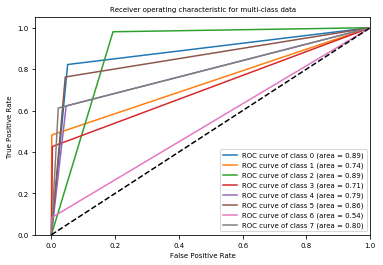

71.3

In [161]:
metric_calc(ada_tuned,x_train,Y_train, x_train_mod,y_train_mod)

Results: 
Top 1 Accuracy Rate =  38.1
Top 3 Accuracy Rate =  73.3
ROC-AUC score of the model   : 0.7903911087897506
F1 Score                     : 0.6550260227587924

Precision                    : 0.8039335734855503

Recall                       : 0.6224480935264527

Accuracy of the model        : 0.7325988741513856 

Confusion matrix             : 
[[ 5152    14   386    14    84   224     2   202]
 [  162   993   785     5    69   133     2    38]
 [   16     2 10312     2    33    32     1    47]
 [  218    12   814  1789   244   306     5   243]
 [  538    33  1318    25  3576   361     7    50]
 [  293    19   583     9   353  5680     3   163]
 [  392    21   740     5   343   154   335   137]
 [  226    15   602    14   373   191     5  2486]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      6078
           1       0.90      0.45      0.60      2187
           2       0.66      0.99      0.7

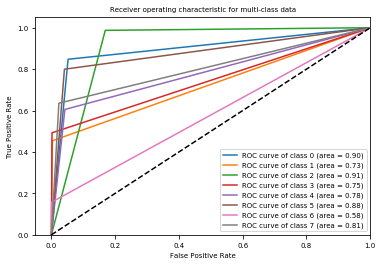

73.3

In [162]:
metric_calc(xgbm_tuned,x_train,Y_train, x_train_mod,y_train_mod)

## 8.3 Training and Evaluation on Test data of all models with XBGclassifier features selection

################################ features_selected ##################################>>>> 1
model beign processed =============================> LogisticRegression   <===========================
Results: 
Top 1 Accuracy Rate =  35.6
Top 3 Accuracy Rate =  71.0
ROC-AUC score of the model   : 0.7745242999513211
F1 Score                     : 0.6274641251576731

Precision                    : 0.7984701936937296

Recall                       : 0.5943483195972308

Accuracy of the model        : 0.7103788171627368 

Confusion matrix             : 
[[1238    1  128    4   33   62    2   28]
 [  33  245  206    0   16   40    0    6]
 [   8    0 2567    0   15   10    0   10]
 [  77    0  271  364   68   87    0   38]
 [ 131    6  307    6  895   73    1   11]
 [  84    4  178    4  101 1366    2   29]
 [  96    4  197    0   96   37   66   20]
 [  80    5  185    3  110   82    2  610]]

Classification report        : 
              precision    recall  f1-score   support

           0       

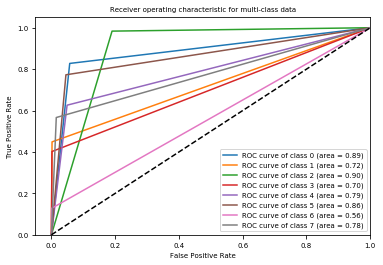

model beign processed =============================>  RandomForestClassifier   <===========================
Results: 
Top 1 Accuracy Rate =  33.6
Top 3 Accuracy Rate =  68.7
ROC-AUC score of the model   : 0.7311862408141838
F1 Score                     : 0.5076744312101917

Precision                    : 0.5957073175342068

Recall                       : 0.5125276582979116

Accuracy of the model        : 0.6867993815229996 

Confusion matrix             : 
[[1335    0   82    0   64    8    0    7]
 [   5    0  462    0   20   59    0    0]
 [   0    0 2608    0    2    0    0    0]
 [  27    0  478  195  100   77    0   28]
 [  47    0  483    0  822   78    0    0]
 [   2    0   49    0  115 1585    0   17]
 [  61    0  308    0  112   28    0    7]
 [  65    0  275    0  118   57    0  562]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1496
           1       0.00      0.00      0.00       54

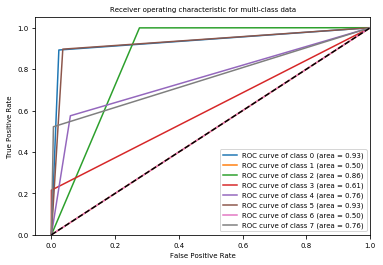

model beign processed =============================>  XGBClassifier   <===========================
Results: 
Top 1 Accuracy Rate =  36.3
Top 3 Accuracy Rate =  71.6
ROC-AUC score of the model   : 0.7744759740223244
F1 Score                     : 0.6219167518986668

Precision                    : 0.8160981640219174

Recall                       : 0.5934047224215365

Accuracy of the model        : 0.7161770390413607 

Confusion matrix             : 
[[1277    0   93    3   24   51    0   48]
 [  29  216  224    0   13   48    0   16]
 [   2    0 2576    0   11   11    0   10]
 [  55    1  272  372   63   88    0   54]
 [ 115    2  347    1  862   88    0   15]
 [  60    2  168    2   98 1393    0   45]
 [  93    2  207    0   96   40   45   33]
 [  63    4  172    3  108   57    0  670]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1496
           1       0.95      0.40      0.56       546
       

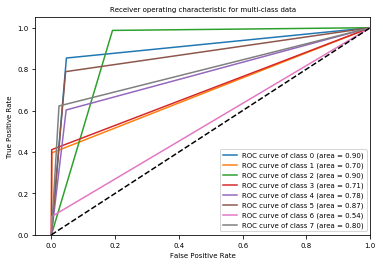

model beign processed =============================>  LGBMClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  36.8
Top 3 Accuracy Rate =  72.2
ROC-AUC score of the model   : 0.7851871400613377
F1 Score                     : 0.6464397153690769

Precision                    : 0.7814826277937561

Recall                       : 0.6135099957421122

Accuracy of the model        : 0.7218786238886742 

Confusion matrix             : 
[[1230    4  138    3   16   54    1   50]
 [  42  230  197    0   11   46    3   17]
 [   9    3 2552    0   18   12    1   15]
 [  62    4  205  441   60   81    1   51]
 [ 136   11  309    7  866   84    3   14]
 [  91   13  137    7   96 1381    2   41]
 [  88    6  151    4   88   47   97   35]
 [  67    9  146    4  104   73    1  673]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.71      0.82      0.76      1496
           1       0.82      0.42      0.56       546
       

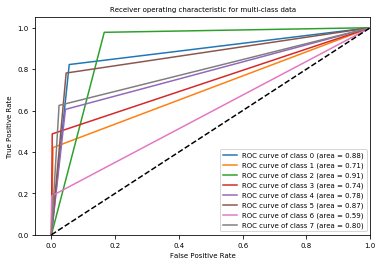

model beign processed =============================>  AdaBoostClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  35.4
Top 3 Accuracy Rate =  70.1
ROC-AUC score of the model   : 0.7692627256892218
F1 Score                     : 0.6146281093360146

Precision                    : 0.8019965442857251

Recall                       : 0.585254251003019

Accuracy of the model        : 0.7014882102821801 

Confusion matrix             : 
[[1216    1  142    3   27   66    0   41]
 [  14  249  208    1   16   42    0   16]
 [   6    0 2551    0   19   13    0   21]
 [  71    1  276  354   65   87    0   51]
 [ 111    1  336   12  882   77    0   11]
 [  83    3  211    8   98 1323    0   42]
 [ 103    3  206    1   95   37   44   27]
 [  65    2  174    8  119   69    0  640]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1496
           1       0.96      0.46      0.62       546
    

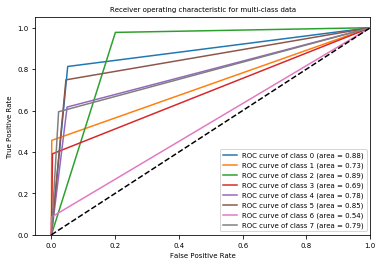

model beign processed =============================>  GradientBoostingClassifier  <===========================
Results: 
Top 1 Accuracy Rate =  36.5
Top 3 Accuracy Rate =  72.1
ROC-AUC score of the model   : 0.7808478768597353
F1 Score                     : 0.6368984655052328

Precision                    : 0.7931347300570133

Recall                       : 0.6052122648003023

Accuracy of the model        : 0.7205257054503286 

Confusion matrix             : 
[[1258    4   98    3   23   57    1   52]
 [  37  222  211    1   14   48    1   12]
 [   5    2 2575    0    8    9    0   11]
 [  60    3  226  413   58   86    0   59]
 [ 121    8  339    3  857   88    0   14]
 [  79    8  148    3   99 1390    2   39]
 [  86    8  173    2   94   44   77   32]
 [  65    4  160    4  110   68    2  664]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.74      0.84      0.78      1496
           1       0.86      0.41      0.55      

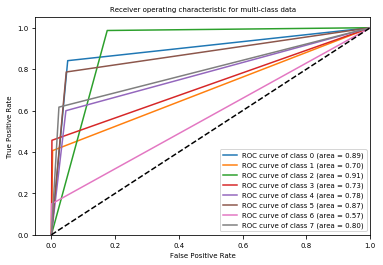

model beign processed =============================>  SVM <===========================
Results: 
Top 1 Accuracy Rate =  35.099999999999994
Top 3 Accuracy Rate =  70.5
ROC-AUC score of the model   : 0.7581312496215613
F1 Score                     : 0.5848475817134693

Precision                    : 0.8047075932436563

Recall                       : 0.5625817734510198

Accuracy of the model        : 0.7052570545032857 

Confusion matrix             : 
[[1266    1  122    0   17   37    0   53]
 [  44  100  306    0   16   69    0   11]
 [   3    2 2568    0   19    6    0   12]
 [  53    0  291  346   79   80    1   55]
 [  94    4  403    1  846   75    0    7]
 [  41    0   59    0   93 1526    1   48]
 [  81    0  223    0   93   38   50   31]
 [  69    3  214    1  132   62    0  596]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.77      0.85      0.80      1496
           1       0.91      0.18      0.30       546
     

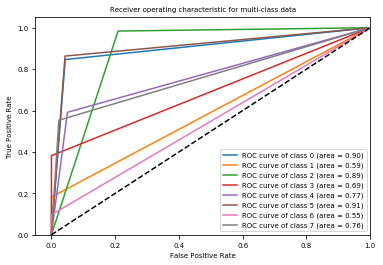

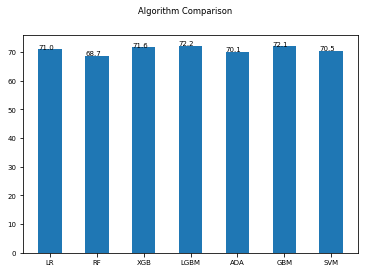

In [153]:
func_models_tuned_one(features_selected_xgb)

##### Among all models with XGBM features selected LGBM classifier is performing at par with all models

## 8.4  Calculating Metrics for LGBMClassifier

Results: 
Top 1 Accuracy Rate =  36.8
Top 3 Accuracy Rate =  72.2
ROC-AUC score of the model   : 0.7851871400613377
F1 Score                     : 0.6464397153690769

Precision                    : 0.7814826277937561

Recall                       : 0.6135099957421122

Accuracy of the model        : 0.7218786238886742 

Confusion matrix             : 
[[1230    4  138    3   16   54    1   50]
 [  42  230  197    0   11   46    3   17]
 [   9    3 2552    0   18   12    1   15]
 [  62    4  205  441   60   81    1   51]
 [ 136   11  309    7  866   84    3   14]
 [  91   13  137    7   96 1381    2   41]
 [  88    6  151    4   88   47   97   35]
 [  67    9  146    4  104   73    1  673]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.71      0.82      0.76      1496
           1       0.82      0.42      0.56       546
           2       0.67      0.98      0.79      2610
           3       0.95      0.49      0.64       90

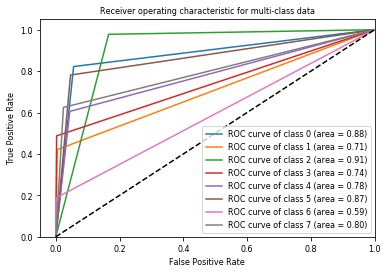

72.2

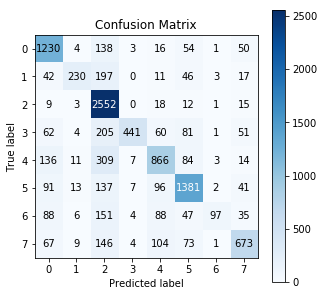

In [335]:
lgbm_selected=lgbm_tuned.fit(x_train,Y_train)
metric_calc(lgbm_selected,x_train,Y_train, x_test,Y_test)

# 9 . Final Model and Model Performance 

## 9.1 Evaluating LGBM model - GAINS CHART

In [61]:
group = Y_train.unique()
list_all= []
prob_data = pd.DataFrame()
data_train_e = pd.concat([x_train.reset_index(drop='True'),Y_train.reset_index(drop='True')],axis=1)
data_test_e = pd.concat([x_test.reset_index(drop='True'),Y_test.reset_index(drop='True')],axis=1)
j=len(group)
for k in range(0,j):
    idx = [name for name, index in intents_mapping.items() if index == k]
    #variable=[['ACCOUNTVALUE/SURRENDERVALUE'],['DUEDATE/AMOUNT'],['POLICYSTATUS-ACTIVE/LAPSE']]
    if idx ==['DUEDATE/AMOUNT'] :
        print('Intent -->',idx)
        data_new_train = features_clear_intent(data_train_e,group[k])
        data_new_test = features_clear_intent(data_test_e,group[k])
        target='CLEAN_INTENT'
        clf=lgbm_selected
        clf.fit(x_train,data_new_train['CLEAN_INTENT'])
        scores_train = scoring(x_train,clf,data_new_train[target])
        scores_test = scoring(x_test,clf,data_new_test[target])
        print('scores_test--',scores_test.head())
        
        

Intent --> ['DUEDATE/AMOUNT']
scores_test--       SCORE  DECILE  TARGET  NONTARGET
0  0.249601     1.0       0          1
1  0.090390    10.0       1          0
2  0.175367     3.0       0          1
3  0.095494     8.0       0          1
4  0.101217     7.0       0          1


### 9.1.1 Creating a Gain table.

In [62]:
deciling(scores_train,['DECILE'],'TARGET','NONTARGET')

   DECILE  TARGET  NONTARGET
0     6.0       0          1
1     4.0       0          1
2     1.0       1          0
3     8.0       0          1
4    10.0       0          1


,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,KS
DECILE,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0
1.0,4139,1813,2326,43.8029,1813,2326,30.8859,6.54824,24.3376
2.0,4139,1034,3105,24.9819,2847,5431,48.5009,15.2895,33.2113
3.0,4139,696,3443,16.8157,3543,8874,60.3578,24.9824,35.3753
4.0,4139,482,3657,11.6453,4025,12531,68.569,35.2777,33.2913
5.0,4139,447,3692,10.7997,4472,16223,76.184,45.6716,30.5124
6.0,4139,347,3792,8.38367,4819,20015,82.0954,56.3469,25.7485
7.0,4139,340,3799,8.21454,5159,23814,87.8876,67.042,20.8455
8.0,4139,258,3881,6.23339,5417,27695,92.2828,77.968,14.3148


In [63]:
deciling(scores_test,['DECILE'],'TARGET','NONTARGET')

   DECILE  TARGET  NONTARGET
0     1.0       0          1
1    10.0       1          0
2     3.0       0          1
3     8.0       0          1
4     7.0       0          1


,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,KS
DECILE,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0
1.0,1035,439,596,42.4155,439,596,29.9046,6.71171,23.1929
2.0,1035,259,776,25.0242,698,1372,47.5477,15.4505,32.0972
3.0,1035,151,884,14.5894,849,2256,57.8338,25.4054,32.4284
4.0,1034,119,915,11.5087,968,3171,65.9401,35.7095,30.2306
5.0,1035,113,922,10.9179,1081,4093,73.6376,46.0923,27.5453
6.0,1035,106,929,10.2415,1187,5022,80.8583,56.5541,24.3043
7.0,1034,73,961,7.05996,1260,5983,85.8311,67.3761,18.4549
8.0,1035,70,965,6.76329,1330,6948,90.5995,78.2432,12.3562


### 9.1.2 Lift chart, Actual vs predicted and Gains chart 

In [64]:
lift_train = pd.concat([x_train,scores_train],axis=1)
lift_test = pd.concat([x_test,scores_test],axis=1)

   DECILE     ACTUAL       PRED   DIST_TAR      LIFT
0    10.0  43.802851  33.203774  30.885860  3.088586
1    20.0  24.981880  20.995911  48.500852  2.425043
2    30.0  16.815656  14.840699  60.357751  2.011925
3    40.0  11.645325  12.568534  68.568995  1.714225
4    50.0  10.799710  11.922901  76.183986  1.523680


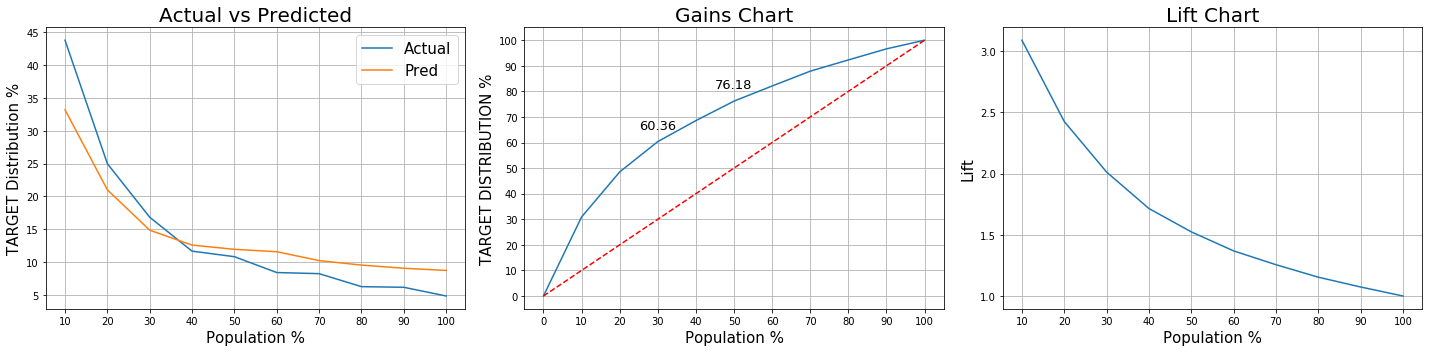

In [65]:
gains(lift_train,['DECILE'],'TARGET','SCORE')

   DECILE     ACTUAL       PRED   DIST_TAR      LIFT
0    10.0  42.415459  34.039794  29.904632  2.990463
1    20.0  25.024155  21.057389  47.547684  2.377384
2    30.0  14.589372  14.641354  57.833787  1.927793
3    40.0  11.508704  12.522551  65.940054  1.648501
4    50.0  10.917874  11.894077  73.637602  1.472752


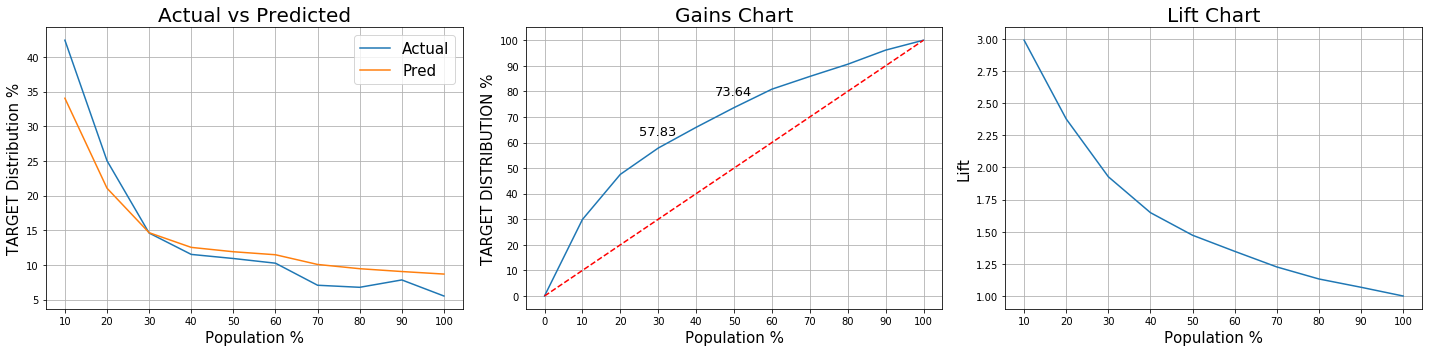

In [66]:
gains(lift_test,['DECILE'],'TARGET','SCORE')

## 9.2 Model Performance for predicting intent Individually( LGBM )

In [163]:
from sklearn import preprocessing
le_2 = preprocessing.LabelEncoder()
data_2['CLEAN_INTENT'] = le_2.fit_transform(data_2['CLEAN_INTENT'])
intents_mapping_n= {l : i for i,l in enumerate (le_2.classes_)}
intents_mapping_n

{'ACCOUNTVALUE/SURRENDERVALUE': 0,
 'BONUSINQUIRY': 1,
 'DUEDATE/AMOUNT': 2,
 'ECS/CREDITCARDINQUIRY': 3,
 'LOANENQUIRY': 4,
 'PAYMENTPROCEDURE/ONLINEPAYMENTPROCEDURE': 5,
 'POLICYPACKDISPATCHSTATUS/CLARIFICATION': 6,
 'POLICYSTATUS-ACTIVE/LAPSE': 7,
 'POSREQUESTSTATUSREQUIRED': 8,
 'PREMIUMPAYMENT/CHEQUERECEIVEDENQUIRY': 9,
 'PREMIUMRECEIPTREQUEST': 10,
 'PROBABLESURRENDER': 11,
 'STATUSOFTHEPROPOSAL': 12}

In [164]:
x_train_n, x_test_n, Y_train_n, Y_test_n = train_test_split(data_2.drop("CLEAN_INTENT", axis=1), data_2['CLEAN_INTENT'], test_size = 0.2,random_state=590, stratify=data_2['CLEAN_INTENT'])  

In [165]:
x_train_n=x_train_n[features_selected_xgb]
x_test_n=x_test_n[features_selected_xgb]

In [168]:
group = Y_train_n.unique()
list_all= []
data_train_1 = pd.concat([x_train_n.reset_index(drop='True'),Y_train_n.reset_index(drop='True')],axis=1)
data_test_1 = pd.concat([x_test_n.reset_index(drop='True'),Y_test_n.reset_index(drop='True')],axis=1)
j=len(group)
for k in group:
    idx = [name for name, index in intents_mapping_n.items() if index == k]
    print('Intent -->',idx)
    data_new_train = features_clear_intent(data_train_1,group[k])
    data_new_test = features_clear_intent(data_test_1,group[k])
    target='CLEAN_INTENT'
    xgb_1 =  lgbm_selected
    xgb_1.fit(x_train_n,data_new_train['CLEAN_INTENT'])
    Y_pred=xgb_1.predict(x_test_n)       
    print('Accuracy-->',round(accuracy_score(data_new_test['CLEAN_INTENT'], Y_pred)*100),2)

Intent --> ['PREMIUMRECEIPTREQUEST']
Accuracy--> 0.9
Intent --> ['POSREQUESTSTATUSREQUIRED']
Accuracy--> 0.95
Intent --> ['DUEDATE/AMOUNT']
Accuracy--> 0.98
Intent --> ['POLICYSTATUS-ACTIVE/LAPSE']
Accuracy--> 0.94
Intent --> ['ACCOUNTVALUE/SURRENDERVALUE']
Accuracy--> 0.95
Intent --> ['ECS/CREDITCARDINQUIRY']
Accuracy--> 0.86
Intent --> ['PROBABLESURRENDER']
Accuracy--> 0.91
Intent --> ['PREMIUMPAYMENT/CHEQUERECEIVEDENQUIRY']
Accuracy--> 0.86
Intent --> ['BONUSINQUIRY']
Accuracy--> 0.85
Intent --> ['LOANENQUIRY']
Accuracy--> 0.85
Intent --> ['PAYMENTPROCEDURE/ONLINEPAYMENTPROCEDURE']
Accuracy--> 0.83
Intent --> ['STATUSOFTHEPROPOSAL']
Accuracy--> 0.84
Intent --> ['POLICYPACKDISPATCHSTATUS/CLARIFICATION']
Accuracy--> 0.84


# 10 Predictions - TOP 3 intents for TEST data

In [51]:
# TOP-3

def predict_top3_classes(classifier, X_test, valid_y):
    
    n = 3
    classifier.probability = True
    probas = classifier.predict_proba(X_test)
    predictions = classifier.predict(X_test)

    top_n_predictions = np.argsort(probas, axis = 1)[:,-n:] #probability 

    top_class = classifier.classes_[top_n_predictions]#classes

    top_class_df = pd.DataFrame(data=top_class)
    predictions_df= pd.DataFrame(data=predictions)

    results = pd.merge( X_test, valid_y, left_index=True, right_index=True)
    results = pd.merge(results, top_class_df, left_index=True, right_index=True)
    leng =results.shape[0]
    predicted_class=[]
    results['predicted_class']=0
    for i in range(0,leng) :

        if (results.iloc[:,0][i] == results[0][i]) :
            predicted_class.append(results[0][i])
           
        elif (results.iloc[:,0][i] == results[1][i]) :
            predicted_class.append(results[1][i])
            
        else :
            predicted_class.append(results[2][i])
    results['predicted_class']=predicted_class

    return results

In [48]:

lgbm_tuned=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
importance_type='split', learning_rate=0.05, max_depth=6,
min_child_samples=20, min_child_weight=4, n_estimators=140, n_jobs=-1, 
num_leaves=300, subsample=1.0, subsample_for_bin=200000)
lgbm_selected=lgbm_tuned.fit(x_train,Y_train)

In [52]:
lgbm_tuned=lgbm_selected.fit(x_train,Y_train)
top_3_intents=predict_top3_classes(lgbm_tuned,x_test, Y_test)
top_3_intents.head()

,PLAN_CAT_03,PLAN_CAT_04,MON_CLEARANCE_COUNT,new_policy,POL_PPT,PLAN_CAT_01,POL_COV_TERM,POS_COUNT,POLICY_CHNL_04,SCP_SMS_SYS,...,SCP_EML_SCP_EML_OTHERS,POLICY_CHNL_02,PLAN_FAMILY_16,UNO_CS_COMM_COUNT,PLAN_FAMILY_03,CLEAN_INTENT,0,1,2,predicted_class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,7,2,4,7,7
1,0,0,0,0,999,1,27,0,1,1,...,0,0,0,0,0,4,5,3,2,2
2,0,1,0,0,999,0,15,0,0,0,...,0,0,1,21,0,7,2,4,0,0
3,0,1,1,0,5,0,10,0,0,0,...,0,0,1,0,0,5,0,2,5,0
4,1,0,1,0,10,0,20,0,0,0,...,0,0,0,0,0,5,0,2,5,5


In [53]:
top_3_intents.to_csv('Final_results.csv')

# 11 Save Model for future use

In [ ]:
from collections import defaultdict
from sklearn.externals import joblib
d = defaultdict(preprocessing.LabelEncoder)
filename = 'final_model.model'
i = [d,lgbm_selected]
joblib.dump(i,filename)

# 12 Predicting the score 

In [120]:
# Use the code to load the model
filename = 'final_model.model'

from sklearn.externals import joblib
d,lgbm_selected=joblib.load(filename)

#### Score New data


In [121]:
def score_new(features,model):
    score = pd.DataFrame(model.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    return(score)

In [122]:
### For a new file named "new_score_data" can be justed called to have the score generated

In [ ]:
scores = score_new(new_score_data,lgbm)

In [ ]:
#################################################################################################################################